In [2]:
#I'm following the tutorial from Brian Hargreaves, http://mrsrl.stanford.edu/~brian/bloch/
#Thanks a lot for your help !

In [3]:
#Libary loading
import numpy as np
import numpy.linalg as la
import math
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex, HTML
from mpl_toolkits.mplot3d import Axes3D
from pt_mri.simulator.Simulator import Simulator
from pt_mri.simulator.MatrixGenerator import MatrixGenerator
from pt_mri.simulator.Flip import Flip
from pt_mri.simulator.FreePrecess import FreePrecess
from pt_mri.simulator.SteadyState import SteadyState
import random
import cmath

%matplotlib notebook
%load_ext autoreload
%autoreload 2

plt.rcParams.update({'figure.max_open_warning': 0})

matrix_generator=MatrixGenerator()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
display(HTML('Transfer matrix for the transverse relaxation'))
display(Math(r'M_{x}(t)=M_{x}(0)\cdot e^{(-\frac{t}{T2})}'))
display(Math(r'M_{y}(t)=M_{y}(0)\cdot e^{(-\frac{t}{T2})}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
M1=[math.exp(-50/100), 0 ,0]
print (M1)

[0.6065306597126334, 0, 0]


In [6]:
A=np.asarray([[math.exp(-50/100), 0,0],[0,math.exp(-50/100),0],[0,0,1]])
print (A.dot([1,0,0]))
print (A.dot([0,1,0]))
print (A.dot([0,0,1]))

[ 0.60653066  0.          0.        ]
[ 0.          0.60653066  0.        ]
[ 0.  0.  1.]


In [7]:
display(HTML('Transfer matrix for the longitudinal relaxation'))
display(Math(r'M_{z}(t)=M_{0}+(M_{z}(0)-M_{0})\cdot e^{(-\frac{t}{T1})}'))

<IPython.core.display.Math object>

In [8]:
A=np.asarray([[1,0,0],[0,1,0],[0,0,math.exp(-50/600)]])
B=np.asarray([0,0,(1-math.exp(-50/600))])

In [9]:
T1=600 #ms
T2=200 #ms
time=50 # ms
[A,B]=matrix_generator.getT1T2Matrix(time,T1,T2)
print(A)
print(B)

print(A.dot(np.array([1,0,0]))+B)
print(A.dot(np.array([0,1,0]))+B)
print(A.dot(np.array([0,0,1]))+B)

[[ 0.77880078  0.          0.        ]
 [ 0.          0.77880078  0.        ]
 [ 0.          0.          0.92004441]]
[ 0.          0.          0.07995559]
[ 0.77880078  0.          0.07995559]
[ 0.          0.77880078  0.07995559]
[ 0.  0.  1.]


In [12]:
phi=math.pi/4
Rz=np.asarray([[math.cos(phi), -math.sin(phi), 0],[math.sin(phi), math.cos(phi), 0],[0,0,1]])
print(Rz)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


In [11]:
print(matrix_generator.getZRotationMatrix(math.pi/2))

[[  6.12323400e-17  -1.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   6.12323400e-17   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


In [10]:
print("Rotation of 90° around X", matrix_generator.getXRotationMatrix(math.pi/2).dot(np.array([0,0,1])))
print("Rotation of 90° around Y", matrix_generator.getYRotationMatrix(math.pi/2).dot(np.array([0,0,1])))
print("Rotation of 90° around Z", matrix_generator.getZRotationMatrix(math.pi/2).dot(np.array([1,0,0])))
print("Rotation of 90° around Z", matrix_generator.getZRotationMatrix(math.pi/2).dot(np.array([1,0,0])))
print("Matrix rotation around theta axis, phi=pi/4, theta=pi/6\n", matrix_generator.getThetaRotationMatrix(math.pi/4,math.pi/6))
print("Theta is defined as the positive angle between the axis X and the rotation axis, in the X-Y plane")

Rotation of 90° around X [  0.00000000e+00  -1.00000000e+00   6.12323400e-17]
Rotation of 90° around Y [  1.00000000e+00   0.00000000e+00   6.12323400e-17]
Rotation of 90° around Z [  6.12323400e-17   1.00000000e+00   0.00000000e+00]
Rotation of 90° around Z [  6.12323400e-17   1.00000000e+00   0.00000000e+00]
Matrix rotation around theta axis, phi=pi/4, theta=pi/6
 [[ 0.9267767   0.12682648  0.35355339]
 [ 0.12682648  0.78033009 -0.61237244]
 [-0.35355339  0.61237244  0.70710678]]
Theta is defined as the positive angle between the axis X and the rotation axis, in the X-Y plane


In [11]:
T1=600 #ms 
T2=100 #ms 
df=10 #Hz
t= 1000 #ms
matrix_generator.getFreePrecessMatrix(t,T1,T2,df)

[array([[  4.53999298e-05,   1.11197757e-19,   0.00000000e+00],
        [ -1.11197757e-19,   4.53999298e-05,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   1.88875603e-01]]),
 array([ 0.       ,  0.       ,  0.8111244])]

In [12]:
time_step=1
time_range=range(0,1000)
list=[]
[A,B]=matrix_generator.getFreePrecessMatrix(time_step,T1,T2,df)
M=[1,0,0]
for t in time_range:
    M=A.dot(M)+B
    list.append(np.insert(M,0,t))

result=np.asarray(list)

In [13]:
t=result[:,0]
Mx=result[:,1]
My=result[:,2]
Mz=result[:,3]

<IPython.core.display.Javascript object>


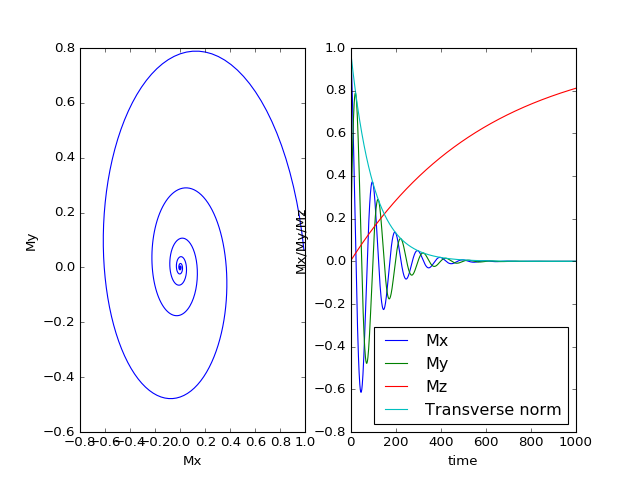

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\legend.py:325: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	upper center
	center
	lower center
	right
	upper right
	upper left
	center right
	lower left
	best
	center left
	lower right

  six.iterkeys(self.codes))))


In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
plt.plot(Mx,My)
plt.xlabel('Mx')
plt.ylabel('My')
plt.subplot(1,2,2)
plt.plot(t,Mx, label="Mx")
plt.plot(t,My, label="My")
plt.plot(t,Mz, label="Mz")
plt.plot(t,np.sqrt(Mx**2+My**2), label="Transverse norm")
plt.legend(loc='bottom right')
plt.xlabel('time')
plt.ylabel('Mx/My/Mz')
plt.show()

<IPython.core.display.Javascript object>


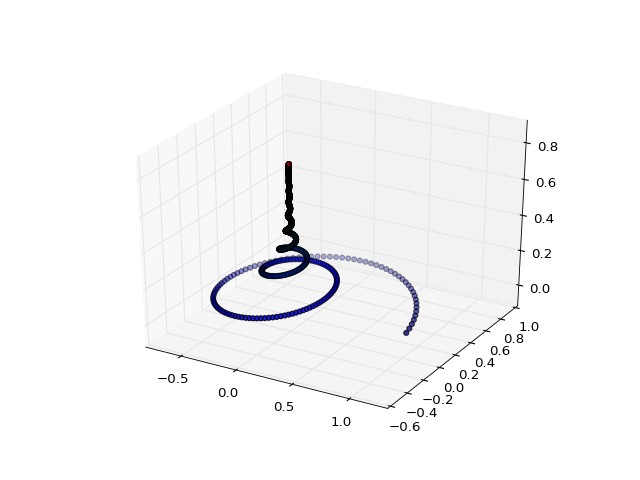

In [15]:
fig=plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(Mx,My,Mz,c=range(len(Mx)))
ax.axis('equal')
plt.show()

In [15]:
T1=600 #ms
T2=100 #ms
df=0 # No off-resonnance
TR=500 #ms
TE=1 #ms
flip_angle=math.pi/3 # around y

Ry=matrix_generator.getYRotationMatrix(flip_angle)
[A,B]=matrix_generator.getFreePrecessMatrix(TE,T1,T2,df)
print (A.dot(Ry.dot([0,0,1]))+B)

[ 0.85740831  0.          0.50083264]


In [16]:
# B-1b Only two excitations
simulator=Simulator()
simulator.addSequenceItem(Flip(flip_angle,"Y"))
simulator.addSequenceItem(FreePrecess(TR, T1, T2, df))
simulator.addSequenceItem(Flip(flip_angle,"Y"))
simulator.addSequenceItem(FreePrecess(TE, T1, T2, df))
print(simulator.run(np.array([0,0,1])))

[[ 0.          0.          1.        ]
 [ 0.8660254   0.          0.5       ]
 [ 0.00583523  0.          0.7827009 ]
 [ 0.68075648  0.          0.38629699]
 [ 0.67398284  0.          0.38731897]]


<IPython.core.display.Javascript object>


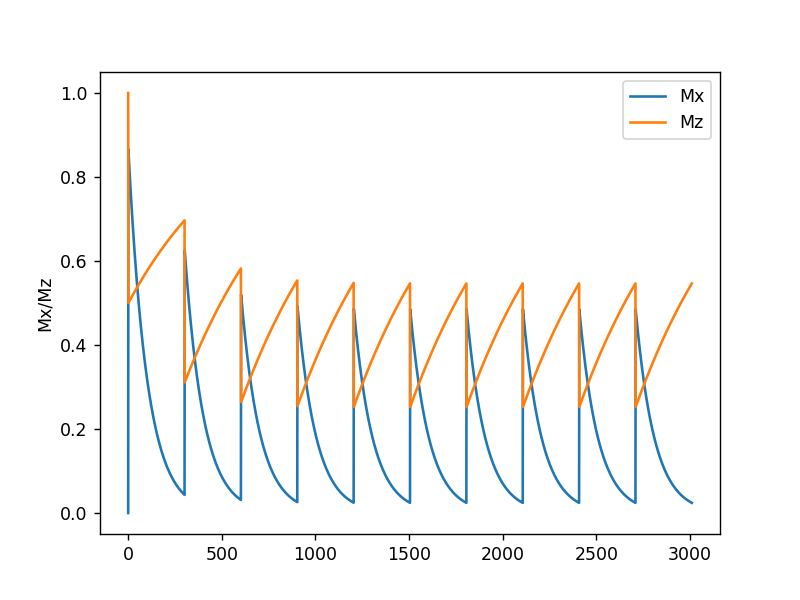

In [17]:
simulator=Simulator()
for i in range(10):
    simulator.addSequenceItem(Flip(flip_angle,"Y"))
    for j in range(300):
        simulator.addSequenceItem(FreePrecess(TE,T1,T2,df))

result=simulator.run(np.array([0,0,1]))
Mx=result[:,0]
My=result[:,1]
Mz=result[:,2]
plt.figure()
plt.plot(Mx, label='Mx')
#plt.plot(My, label='My')
plt.plot(Mz, label='Mz')
plt.ylabel('Mx/Mz')
plt.legend()
plt.show()

In [18]:
display(HTML('We need to solve this equation'))
display(Math(r'M=A_{free prec}\cdot R_{exc}\cdot M+B_{free prec}'))
display(Math(r'M=(I-A_{free prec}\cdot R_{exc})^{-1}\cdot B_{free prec}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [20]:
T1=600 #ms
T2=100 #ms
df=0 # No off-resonnance
TR=300 #ms

[Atr,Btr]=matrix_generator.getFreePrecessMatrix(TR,T1,T2,df)
R=matrix_generator.getYRotationMatrix(math.pi/3)
I=np.eye(3,3)
Mss=la.inv(I-Atr.dot(R)).dot(Btr)
print(Mss)

[ 0.02416558  0.          0.54651488]


In [21]:
#Steady state at echo time, first technique
[Ate,Bte]=matrix_generator.getFreePrecessMatrix(TE,T1,T2,df)
Ate.dot(R.dot(Mss))+Bte

array([ 0.48054896,  0.        ,  0.25357452])

In [22]:
#Steady state at echo time, second technique
display(HTML('M1 is the magnetisation right before the RF excitation'))
display(HTML('M2 is the magnetisation right after the RF excitation'))
display(Math(r'M_{2}=R_{exc}\cdot M_{1}'))
display(HTML('M3 is the magnetisation at echo time'))
display(Math(r'M_{3}=A_{te}\cdot M_{2}+B_{te}'))
display(Math(r'M_{1}=A_{tr-te}\cdot M_{3}+B_{tr-te}'))
display(HTML('Solving for M3...'))
display(Math(r'M_{3}=A_{te}\cdot R_{exc}\cdot A_{tr-te}\cdot M_{3}+A_{te}\cdot R_{exc}\cdot B_{tr-te}+B_{te}'))
display(Math(r'M_{3}=(I-A_{te}\cdot R_{exc}\cdot A_{tr-te})^{-1}\cdot (A_{te}\cdot R_{exc}\cdot B_{tr-te}+B_{te})'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [23]:
def sssignal(flip_angle,T1,T2,TE,TR,df):
    [Ate,Bte]=matrix_generator.getFreePrecessMatrix(TE,T1,T2,df)
    [Atr,Btr]=matrix_generator.getFreePrecessMatrix(TR-TE,T1,T2,df)
    R=matrix_generator.getYRotationMatrix(flip_angle)
    I=np.eye(3,3)
    Mss=la.inv(I-Ate.dot(R.dot(Atr))).dot(Ate.dot(R.dot(Btr))+Bte)
    return [Mss,Mss[0]+1j*Mss[1]]

In [24]:
print(sssignal(math.pi/3,T1,T2,TE,TR,df))
print(SteadyState().sssignal(math.pi/3,T1,T2,TE,TR,df))

[array([ 0.48054896,  0.        ,  0.25357452]), (0.48054896079580156+0j)]
[array([ 0.48054896,  0.        ,  0.25357452]), (0.48054896079580156+0j)]


In [25]:
# B-1f Symbolic computation of the steady-state longitudinal component (neglecting the transverse component)
display(HTML('M0z is the longitudinal magnetisation right before the RF excitation'))
display(HTML('M1z is the longitudinal magnetisation right after the RF excitation'))
display(HTML('Beta is the angle of the vector M0 with z. Alpha is the flip angle'))
display(Math(r'M0_{z}=cos(\beta)'))
display(Math(r'M1_{z}=cos(\beta+\alpha)'))
display(Math(r'M1_{z}=cos(\beta)\cdot cos(\alpha)-sin(\beta)\cdot sin(\alpha)'))
display(Math(r'M1_{z}=M0_{z}\cdot cos(\alpha)-M0_{x}\cdot sin(\alpha)'))
display(Math(r'M1_{z}=M0_{z}\cdot cos(\alpha)-M0_{x}\cdot sin(\alpha)'))
display(HTML('We assume M0_{x}=0'))
display(Math(r'M1_{z}=M0_{z}\cdot cos(\alpha)'))
display(HTML('T1 relaxation formula'))
display(Math(r'M_{z}(t)=1+(M_{z}(0)-1)\cdot e^{-\frac{t}{T_{1}}}'))
display(HTML('In our case:'))
display(Math(r'M0_{z}=1+(M1_{z}-1)\cdot e^{-\frac{TR}{T_{1}}}'))
display(Math(r'M0_{z}=\frac{1-e^{-\frac{TR}{T_{1}}}}{1-e^{-\frac{TR}{T_{1}}}\cdot cos(\alpha)}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [26]:
(1-math.exp(-TR/T1))/(1-math.exp(-TR/T1)*math.cos(math.pi/3))

0.5647334016064163

In [27]:
T1=600 #ms
T2=100 #ms
df=0 # No off-resonnance
TR=500 #ms

[Atr,Btr]=matrix_generator.getFreePrecessMatrix(TR,T1,T2,df)
Atr=np.array([[0,0,0],[0,0,0],[0,0,1]]).dot(Atr)
R=matrix_generator.getYRotationMatrix(math.pi/3)
I=np.eye(3,3)
Mss=la.inv(I-Atr.dot(R)).dot(Btr)
print(Mss)

[ 0.          0.          0.72237274]


In [28]:
# B-1g We try to find the same result numerically. We have to redefine a new function to get rid of the transverse component
def srsignal(flip_angle,T1,T2,TE,TR,df):
    [Ate,Bte]=matrix_generator.getFreePrecessMatrix(TE,T1,T2,df)
    [Atr,Btr]=matrix_generator.getFreePrecessMatrix(TR-TE,T1,T2,df)
    
    #Here is the trick. We multiply Atr to get completely rid of the transverse component after relaxation
    Atr=np.array([[0,0,0],[0,0,0],[0,0,1]]).dot(Atr)
    
    R=matrix_generator.getYRotationMatrix(flip_angle)
    I=np.eye(3,3)
    Mss=la.inv(I-Ate.dot(R.dot(Atr))).dot(Ate.dot(R.dot(Btr))+Bte)
    return [Mss,Mss[0]+1j*Mss[1]]

In [29]:
#This function gives the magnetisation at echo time, if we consider that the tranverse component has disappeared after the T1 relaxation
print(srsignal(math.pi/3,T1,T2,TE,TR,0))
print(SteadyState().srsignal(math.pi/3,T1,T2,TE,TR,0))

[array([ 0.61936839,  0.        ,  0.36225017]), (0.61936838896628776+0j)]
[array([ 0.61936839,  0.        ,  0.36225017]), (0.61936838896628776+0j)]


<IPython.core.display.Javascript object>


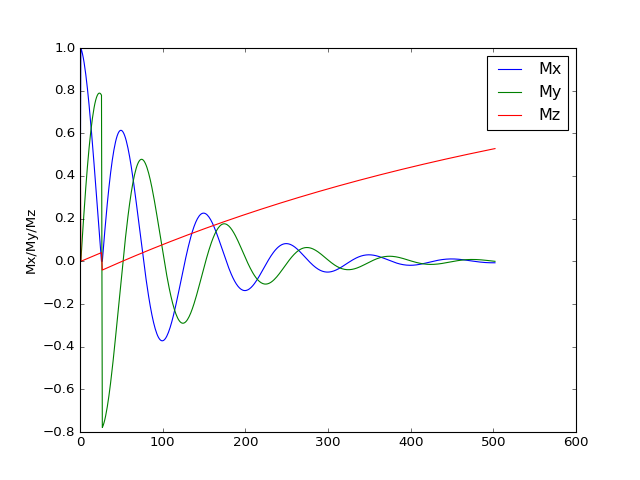

<IPython.core.display.Javascript object>


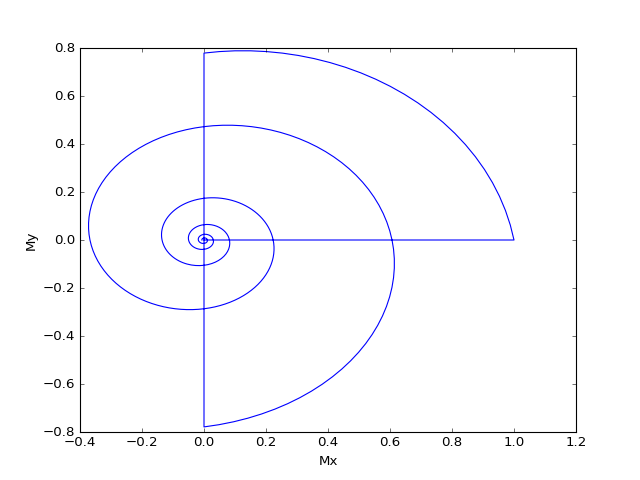

In [30]:
T1=600 #ms
T2=100 #ms
df=10 #Hz
TE=50 #ms
TR=500 #ms

simulator=Simulator()
simulator.addSequenceItem(Flip(math.pi/2,"Y"))
for j in range(int(TE/2)):
    simulator.addSequenceItem(FreePrecess(1,T1,T2,df))
simulator.addSequenceItem(Flip(math.pi,"X"))
for j in range(int(TR-TE/2)):
    simulator.addSequenceItem(FreePrecess(1,T1,T2,df))

result=simulator.run(np.array([0,0,1]))
Mx=result[:,0]
My=result[:,1]
Mz=result[:,2]
plt.figure()
plt.plot(Mx, label='Mx')
plt.plot(My, label='My')
plt.plot(Mz, label='Mz')
plt.ylabel('Mx/My/Mz')
plt.legend()

plt.figure()
plt.plot(Mx,My)
plt.xlabel('Mx')
plt.ylabel('My')
plt.show()

<IPython.core.display.Javascript object>


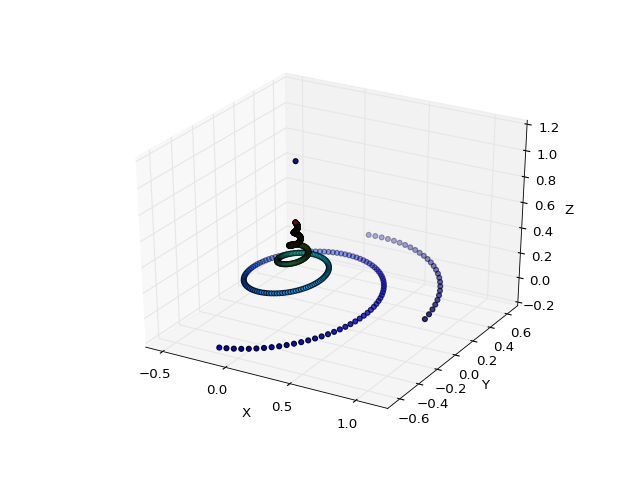

In [31]:
fig=plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(Mx,My,Mz,c=range(len(Mx)))
ax.axis('equal')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

<IPython.core.display.Javascript object>


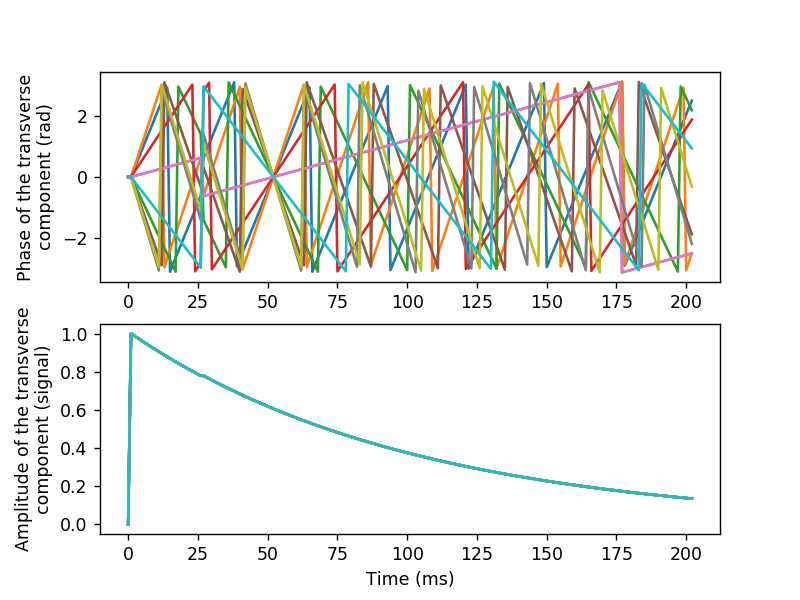

<IPython.core.display.Javascript object>


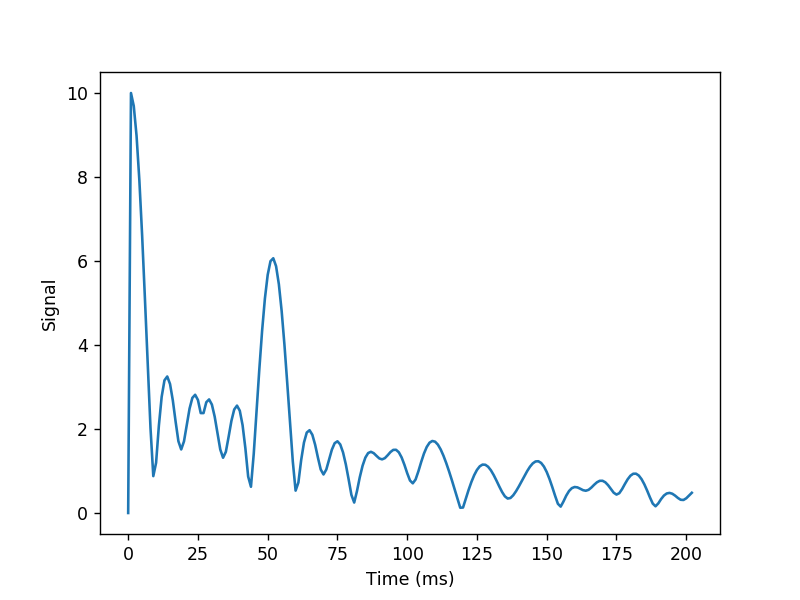

In [19]:
T1=600 #ms
T2=100 #ms
TE=50 #ms
TR=200 #ms

plt.figure()
sum=np.zeros(TR+3)
for i in range(10):
    df=random.randrange(-50,50)
    simulator=Simulator()
    simulator.addSequenceItem(Flip(math.pi/2,"Y"))
    for j in range(int(TE/2)):
        simulator.addSequenceItem(FreePrecess(1,T1,T2,df))
    simulator.addSequenceItem(Flip(math.pi,"X"))
    for j in range(int(TR-TE/2)):
        simulator.addSequenceItem(FreePrecess(1,T1,T2,df))

    result=simulator.run(np.array([0,0,1]))
    
    Mx=result[:,0]
    My=result[:,1]
    Mz=result[:,2]
    transverse_vector=Mx+1j*My
    plt.subplot(2,1,1)
    plt.ylabel("Phase of the transverse\ncomponent (rad)")
    plt.plot(np.angle(transverse_vector))
    plt.subplot(2,1,2)
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude of the transverse\ncomponent (signal)")
    plt.plot(np.abs(transverse_vector))    
    sum=sum+transverse_vector

plt.figure()
plt.plot(np.abs(sum))
plt.xlabel("Time (ms)")
plt.ylabel("Signal")
plt.show()

In [33]:
display(HTML('M1 is the magnetisation right before the 90° RF excitation'))
display(HTML('M2 is the magnetisation right before the 180° RF excitation'))
display(Math(r'M_{2}=A_{\frac{Te}{2}}\cdot R_{90}\cdot M_{1}+B_{\frac{Te}{2}}'))
display(HTML('M3 is the magnetisation at echo time'))
display(Math(r'M_{3}=A_{\frac{Te}{2}}\cdot R_{180}\cdot M_{2}+B_{\frac{Te}{2}}'))
display(Math(r'M_{1}=A_{Tr-Te}\cdot M_{3}+B_{Tr-Te}'))
display(Math(r'M_{3}=(I-A_{\frac{Te}{2}}\cdot R_{180}\cdot A_{\frac{Te}{2}}\cdot R_{90}\cdot A_{Tr-Te})^{-1}\cdot (B_{\frac{Te}{2}}+A_{\frac{Te}{2}}\cdot R_{180}\cdot B_{\frac{Te}{2}}+A_{\frac{Te}{2}}\cdot R_{180}\cdot A_{\frac{Te}{2}}\cdot R_{90}\cdot B_{Tr-Te})'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
def sesignal(T1,T2,TE,TR,df):
    [Ate2,Bte2]=matrix_generator.getFreePrecessMatrix(TE/2,T1,T2,df)
    [Atr,Btr]=matrix_generator.getFreePrecessMatrix(TR-TE,T1,T2,df)
    
    #Here is the trick. We multiply Atr to get completely rid of the transverse component after relaxation
    Atr=np.array([[0,0,0],[0,0,0],[0,0,1]]).dot(Atr)
    
    R90=matrix_generator.getYRotationMatrix(math.pi/2)
    R180=matrix_generator.getXRotationMatrix(math.pi)
    
    I=np.eye(3,3)
    Mss=la.inv(I-Ate2.dot(R180.dot(Ate2.dot(R90.dot(Atr))))).dot(Bte2+Ate2.dot(R180.dot(Bte2))+Ate2.dot(R180.dot(Ate2.dot(R90.dot(Btr)))))
    return [Mss,Mss[0]+1j*Mss[1]]

In [35]:
np.real(sesignal(600,100,50,1000,0)[1])

array(0.4822235671718819)

<IPython.core.display.Javascript object>


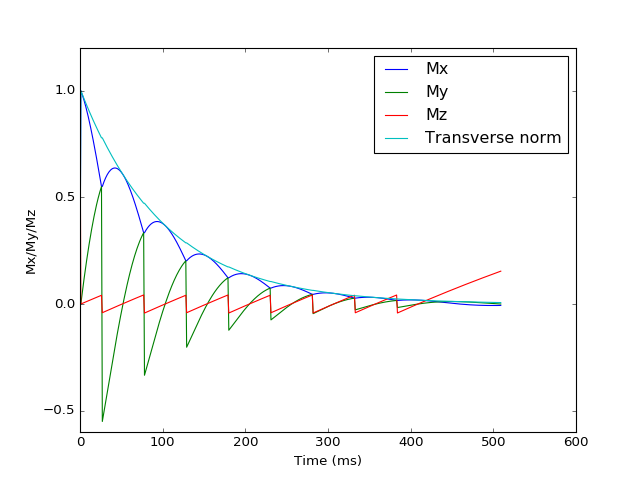

<IPython.core.display.Javascript object>


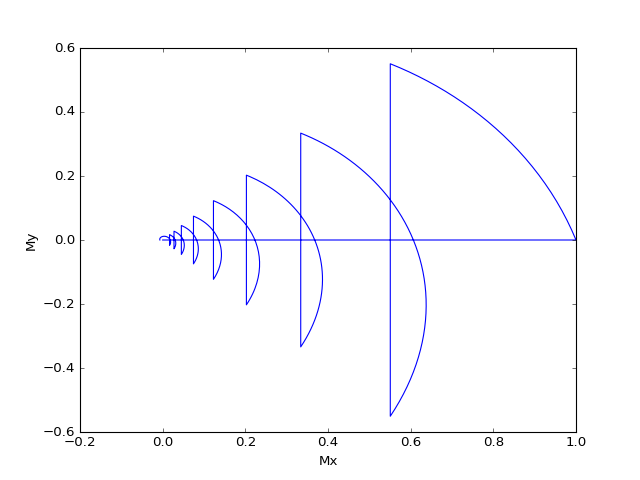

In [36]:
T1=600 #ms
T2=100 #ms
df=5 #Hz
TE=50 #ms
TR=500 #ms
ETL=8

simulator=Simulator()
simulator.addSequenceItem(Flip(math.pi/2,"Y"))

for k in range (ETL):
    for j in range(int(TE/2)):
        simulator.addSequenceItem(FreePrecess(1,T1,T2,df))
    simulator.addSequenceItem(Flip(math.pi,"X"))
    for j in range(int(TE/2)):
        simulator.addSequenceItem(FreePrecess(1,T1,T2,df))

for j in range(int(TR-ETL*TE)):
    simulator.addSequenceItem(FreePrecess(1,T1,T2,df))

result=simulator.run(np.array([0,0,1]))
Mx=result[:,0]
My=result[:,1]
Mz=result[:,2]
plt.figure()
plt.plot(Mx, label='Mx')
plt.plot(My, label='My')
plt.plot(Mz, label='Mz')
plt.plot(np.sqrt(Mx**2+My**2), label="Transverse norm")
plt.ylabel('Mx/My/Mz')
plt.xlabel('Time (ms)')
plt.legend()

plt.figure()
plt.plot(Mx,My)
plt.xlabel('Mx')
plt.ylabel('My')
plt.show()

<IPython.core.display.Javascript object>


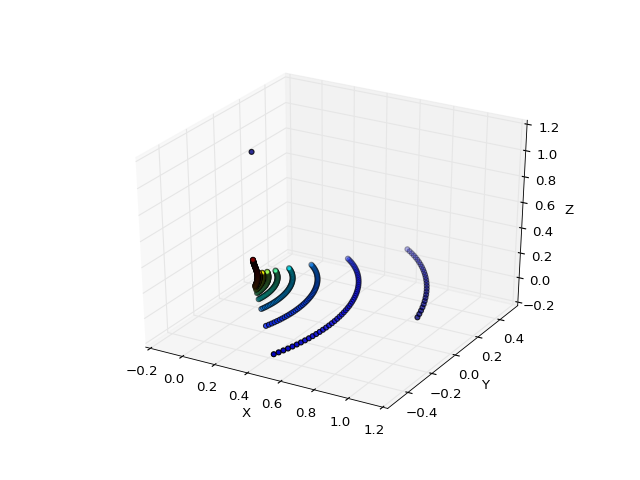

In [37]:
fig=plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(Mx,My,Mz,c=range(len(Mx)))
ax.axis('equal')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [39]:
#Calculation of the steady state
display(HTML('M0 is the magnetisation right after the 90° RF excitation. After one spin-echo sequence, we have M1:'))
display(Math(r'M_{1}=A_{\frac{Te}{2}}\cdot R_{180}\cdot (A_{\frac{Te}{2}}\cdot M_{0}+B_{\frac{Te}{2}})+B_{\frac{Te}{2}}'))
display(Math(r'M_{1}=(A_{\frac{Te}{2}}\cdot R_{180}\cdot A_{\frac{Te}{2}})\cdot M_{0}+(A_{\frac{Te}{2}}\cdot R_{180}\cdot B_{\frac{Te}{2}}+B_{\frac{Te}{2}})'))
display(HTML('Lets define the two matrices A1 and B1:'))
display(Math(r'M_{1}=A_{1}\cdot M_{0}+B_{1}'))
display(HTML('Lets evaluate M2, after a second cycle:'))
display(Math(r'M_{2}=(A_{\frac{Te}{2}}\cdot R_{180}\cdot A_{\frac{Te}{2}})\cdot M_{1}+(A_{\frac{Te}{2}}\cdot R_{180}\cdot B_{\frac{Te}{2}}+B_{\frac{Te}{2}})'))
display(HTML('Lets define the two matrices A2 and B2:'))
display(Math(r'M_{2}=A_{2}\cdot M_{0}+B_{2}'))
display(HTML('A2 can be calculated using A1:'))
display(Math(r'A_{2}=A_{\frac{Te}{2}}\cdot R_{180}\cdot A_{\frac{Te}{2}}\cdot A_{1}'))
display(HTML('and for B2:'))
display(Math(r'B_{2}=A_{\frac{Te}{2}}\cdot R_{180}\cdot B_{\frac{Te}{2}}+B_{\frac{Te}{2}}+A_{\frac{Te}{2}}\cdot R_{180}\cdot A_{\frac{Te}{2}}\cdot B_{1}'))
display(HTML('This gives the recurrence formula for the cycles.'))
display(HTML('The complete Turbo-Spin-Echo cycle can be written, in steady-state:'))
display(Math(r'M=R_{90}\cdot (A_{Tr}\cdot (A_{ETL}\cdot M+B_{ETL})+B_{Tr})'))
display(HTML('M is the magnetisation right after the 90° RF excitation, in steady state'))
display(Math(r'M=(I-R_{90}\cdot A_{Tr}\cdot A_{ETL})^{-1}+R_{90}\cdot A_{Tr}\cdot B_{ETL}+R_{90}\cdot B_{Tr}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [40]:
def fsesignal(T1,T2,TE,TR,ETL,df):
    [Ate2,Bte2]=matrix_generator.getFreePrecessMatrix(TE/2,T1,T2,df)
    [Atr,Btr]=matrix_generator.getFreePrecessMatrix(TR-ETL*TE,T1,T2,df)
    
    #Here is the trick. We multiply Atr to get completely rid of the transverse component after relaxation
    Atr=np.array([[0,0,0],[0,0,0],[0,0,1]]).dot(Atr)
    
    R90=matrix_generator.getYRotationMatrix(math.pi/2)
    R180=matrix_generator.getXRotationMatrix(math.pi)
    
    #Recurrence formula to determine Aetl et Betl
    A=np.eye(3)
    B=np.array([0,0,0])
    for i in range(ETL):
        A=Ate2.dot(R180.dot(Ate2.dot(A)))
        B=Ate2.dot(R180.dot(Bte2))+Bte2+Ate2.dot(R180.dot(Ate2.dot(B)))
    
    I=np.eye(3,3)
    M=la.inv(I-R90.dot(Atr.dot(A))).dot(R90.dot(Atr.dot(B))+R90.dot(Btr))
    result=[M]
    
    #We start from the steady state and calculate M for each echo
    for i in range(ETL):
        M=Ate2.dot(R180.dot(Ate2.dot(M)+Bte2))+Bte2
        result.append(M)
    
    return np.asarray(result)

In [41]:
print(fsesignal(600,100,50,1000,8,10)[:,0])
print(SteadyState().fsesignal(600,100,50,1000,8,10)[:,0])
#It is smaller than in B2c because the multiple cycles are such that the Mz recovery is worst -> at the end of TR, the Mz is smaller, 
#and so the signal is lower.
#If we set ETL=1, we find the same value than in B2c:
print(SteadyState().fsesignal(600,100,50,1000,1,10)[1,0])

[ 0.63227583  0.38349468  0.23260128  0.14107981  0.08556923  0.05190036
  0.03147916  0.01909308  0.01158054]
[ 0.63227583  0.38349468  0.23260128  0.14107981  0.08556923  0.05190036
  0.03147916  0.01909308  0.01158054]
0.482223567172


In [42]:
# B-3-a Gradient-Spoiled Sequences
# At the end of a simple sequence (Flip 90 - Te -Tr), after the Tr, we apply a rotation around Z, with different 
# angles dependending on the position in the image -> the average of the transverse component should be closer to 0
# Result: M at echo time
def gssignal(flip_angle,T1,T2,TE,TR,df, phi):
    [Ate,Bte]=matrix_generator.getFreePrecessMatrix(TE,T1,T2,df)
    [Atr,Btr]=matrix_generator.getFreePrecessMatrix(TR-TE,T1,T2,df)
    
    #Here is the difference, we rotate around z with and angle phi at the end of the relaxation
    Atr=matrix_generator.getZRotationMatrix(phi).dot(Atr)
    
    R=matrix_generator.getYRotationMatrix(flip_angle)
    I=np.eye(3,3)
    Mss=la.inv(I-Ate.dot(R.dot(Atr))).dot(Ate.dot(R.dot(Btr))+Bte)
    return [Mss,Mss[0]+1j*Mss[1]]

In [43]:
print(gssignal(math.pi/3,600,100,2,10,0,math.pi/2))
print(SteadyState().gssignal(math.pi/3,600,100,2,10,0,math.pi/2))

[array([ 0.12479353,  0.11291785,  0.19654944]), (0.12479352904633174+0.11291785460987833j)]
[array([ 0.12479353,  0.11291785,  0.19654944]), (0.12479352904633174+0.11291785460987833j)]


In [44]:
# B-3-b. We use a different phi for 100 different magnetisations + average
def gresignal(flip,T1,T2,TE,TR,dfreq):
    result=np.zeros(3)
    phis=np.arange(1,101,1)
    phis=(phis/100-0.5)*4*math.pi
    for phi in phis:
        [M,Mtranverse]=SteadyState().gssignal(flip,T1,T2,TE,TR,dfreq,phi)
        result=result+M

    result=result/100
    return [result,result[0]+1j*result[1]]

In [45]:
print(gresignal(math.pi/3,600,100,2,10,0))
print(SteadyState().gresignal(math.pi/3,600,100,2,10,0))

[array([  1.15741209e-01,  -6.92453117e-19,   1.80061825e-01]), (0.11574120856556946-6.9245311708188564e-19j)]
[array([  1.15741209e-01,  -6.92453117e-19,   1.80061825e-01]), (0.11574120856556946-6.9245311708188564e-19j)]


In [46]:
SteadyState().srsignal(math.pi/3,600,100,2,10,0)
# -> The transverse component is 4x higher than in the case for which we neglect the transverse component after TR

[array([ 0.02760513,  0.        ,  0.01953347]), (0.027605131112138831+0j)]

<IPython.core.display.Javascript object>


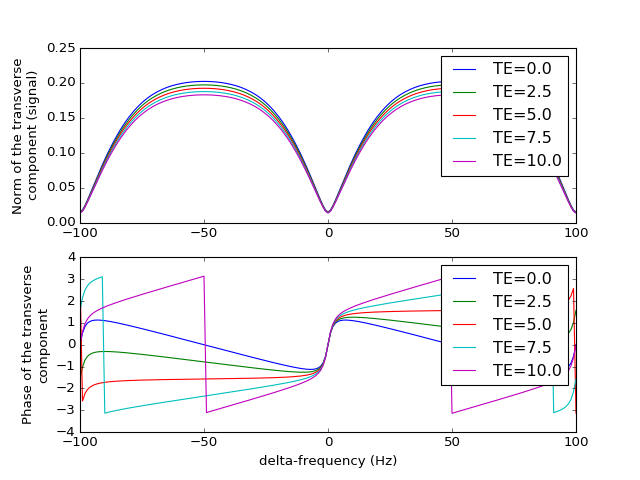

In [47]:
# B-4-a We consider a simple sequence : R60 - TE -TR -R60 - TE - TR

T1 = 600 #ms.
T2 = 100 #ms.
TEs = np.array([0, 2.5, 5, 7.5,10]) #ms.
TR = 10 #ms.
flip = math.pi/3 #rad
dfs = np.linspace(-100,100, 201) #Hz

result=np.zeros((len(TEs),len(dfs)),dtype=np.complex)

for index_TE, TE in enumerate(TEs):
    for index_df, df in enumerate(dfs):
        [M, M_transverse]=SteadyState().sssignal(flip,T1,T2,TE,TR,df)
        result[index_TE,index_df]=M_transverse

plt.figure()
plt.subplot(2,1,1)

plt.ylabel("Norm of the transverse\ncomponent (signal)")
plt.subplot(2,1,2)
plt.ylabel("Phase of the transverse\ncomponent")
plt.xlabel("delta-frequency (Hz)")
for magnetisation, label in zip(result[:], TEs):
    plt.subplot(2,1,1)
    plt.plot(dfs,np.abs(magnetisation),label="TE={0}".format(label))
    plt.subplot(2,1,2)
    plt.plot(dfs,np.angle(magnetisation),label="TE={0}".format(label))

plt.subplot(2,1,1)
plt.legend()
plt.subplot(2,1,2)
plt.legend()
plt.show()
sspf_for_te_0=result[0]

<IPython.core.display.Javascript object>


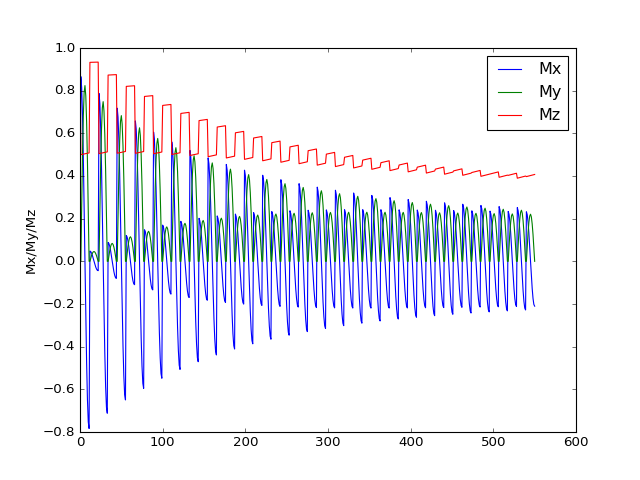

<IPython.core.display.Javascript object>


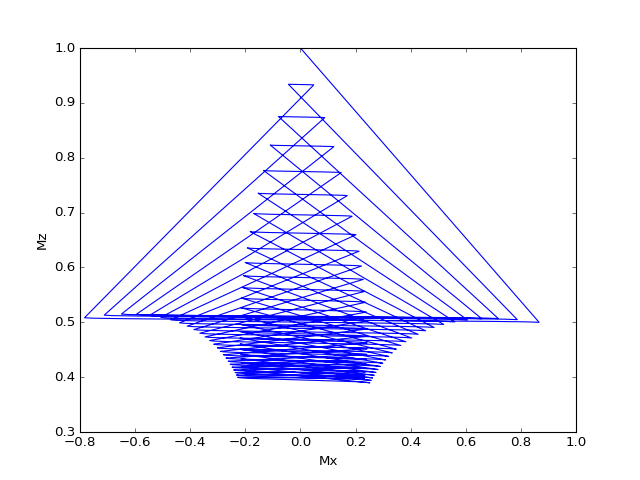

In [47]:
#Lets try so temporally simulate a case to have a better understanding of the situation
simulator=Simulator()
nb_flips=50
#We choose on purpose the resonnant frequency
df=int(2/TR*1000)
for i in range(nb_flips):
    simulator.addSequenceItem(Flip(flip,"Y"))
    for j in range(TR):
        simulator.addSequenceItem(FreePrecess(1,T1,T2,50))

result=simulator.run(np.array([0,0,1]))
Mx=result[:,0]
My=result[:,1]
Mz=result[:,2]
plt.figure()
ax.set_xlim([0, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 1])
plt.plot(Mx, label='Mx')
plt.plot(My, label='My')
plt.plot(Mz, label='Mz')
plt.ylabel('Mx/My/Mz')
plt.legend()

plt.figure()
plt.plot(Mx,Mz)
plt.xlabel('Mx')
plt.ylabel('Mz')
plt.show()

<IPython.core.display.Javascript object>


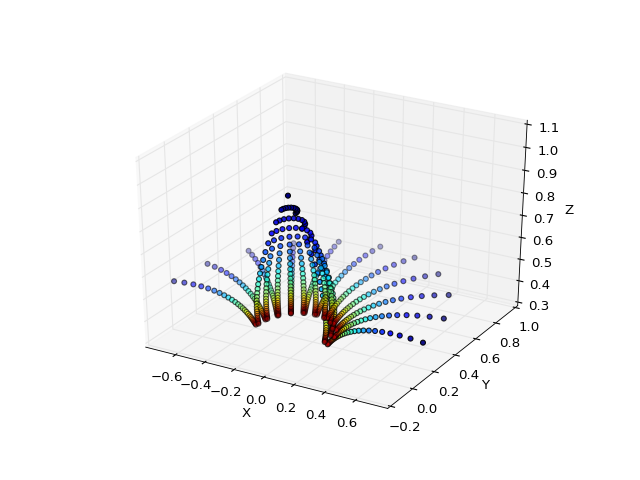

In [48]:
fig=plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(Mx,My,Mz,c=range(len(Mx)))
ax.axis('equal')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [49]:
print ("Mean signal: {0}, Phase: {1}".format(np.abs(np.mean(sspf_for_te_0)),np.angle(np.mean(sspf_for_te_0)))) 

Mean signal: 0.1175671781325704, Phase: 0.0


<IPython.core.display.Javascript object>


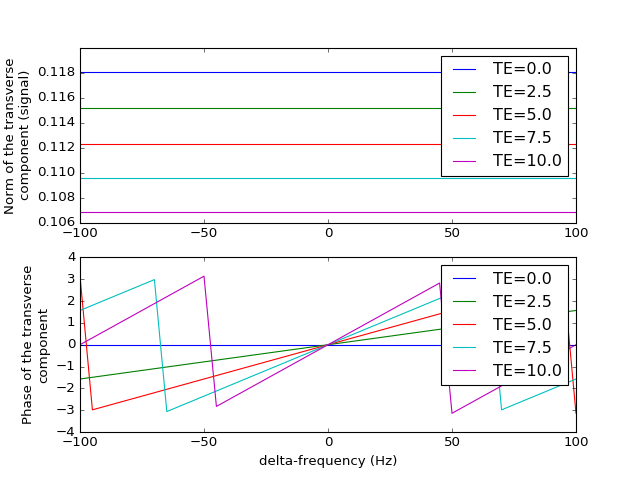

In [50]:
# B-4b Magnitude and phase of the magnetisation for TE=0 + use of spoiled gradient after TR to get rid of the transverse component

T1 = 600 #ms.
T2 = 100 #ms.
TEs = np.array([0, 2.5, 5, 7.5,10]) #ms.
TR = 10 #ms.
flip = math.pi/3 #rad
dfs = np.linspace(-100,100, 41) #Hz

result=np.zeros((len(TEs),len(dfs)),dtype=np.complex)

for index_TE, TE in enumerate(TEs):
    for index_df, df in enumerate(dfs):
        [M, M_transverse]=SteadyState().gresignal(flip,T1,T2,TE,TR,df)
        result[index_TE,index_df]=M_transverse

plt.figure()
plt.subplot(2,1,1)
plt.ylabel("Norm of the transverse\ncomponent (signal)")
plt.subplot(2,1,2)
plt.ylabel("Phase of the transverse\ncomponent")
plt.xlabel("delta-frequency (Hz)")
for magnetisation, label in zip(result[:], TEs):
    plt.subplot(2,1,1)
    plt.plot(dfs,np.abs(magnetisation),label="TE={0}".format(label))
    plt.subplot(2,1,2)
    plt.plot(dfs,np.angle(magnetisation),label="TE={0}".format(label))

plt.subplot(2,1,1)
plt.legend()
plt.subplot(2,1,2)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


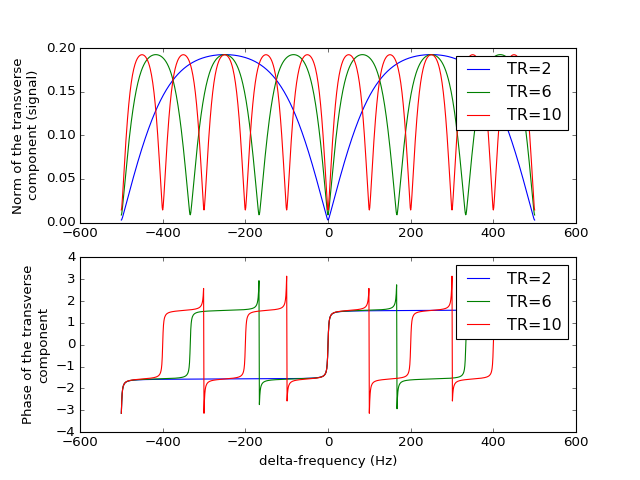

In [51]:
# B-4c
T1 = 600 #ms.
T2 = 100 #ms.
TRs = np.array([2, 6, 10]) #ms.
dfs = np.linspace(-500,500, 1001) #Hz

result=np.zeros((len(TEs),len(dfs)),dtype=np.complex)

for index_TR, TR in enumerate(TRs):
    TE=TR/2
    for index_df, df in enumerate(dfs):
        [M, M_transverse]=SteadyState().sssignal(flip,T1,T2,TE,TR,df)
        result[index_TR,index_df]=M_transverse

plt.figure()
plt.subplot(2,1,1)
plt.ylabel("Norm of the transverse\ncomponent (signal)")
plt.subplot(2,1,2)
plt.ylabel("Phase of the transverse\ncomponent")
plt.xlabel("delta-frequency (Hz)")
for magnetisation, label in zip(result[:], TRs):
    plt.subplot(2,1,1)
    plt.plot(dfs,np.abs(magnetisation),label="TR={0}".format(label))
    plt.subplot(2,1,2)
    plt.plot(dfs,np.angle(magnetisation),label="TR={0}".format(label))

plt.subplot(2,1,1)
plt.legend()
plt.subplot(2,1,2)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


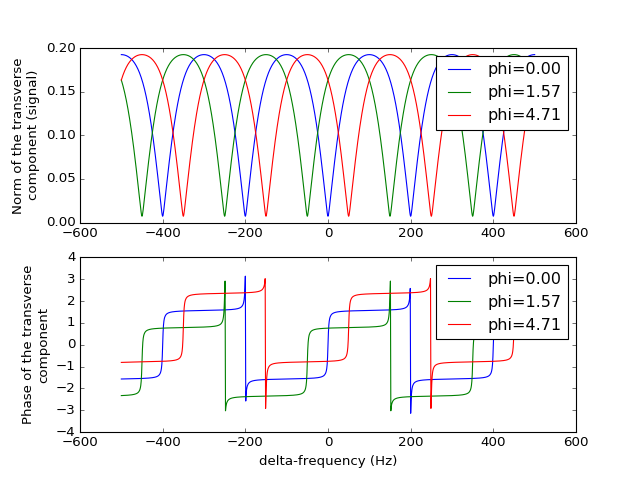

In [52]:
T1 = 600 #ms.
T2 = 100 #ms.
TE = 2.5 #ms.
TR = 5 #ms.
flip = math.pi/3 #rad
dfs = np.linspace(-500,500, 1001) #Hz
phis=[0, math.pi/2, 1.5*math.pi]

result=np.zeros((len(phis),len(dfs)),dtype=np.complex)

for index_phi, phi in enumerate(phis):
    for index_df, df in enumerate(dfs):
        [M, M_transverse]=SteadyState().gssignal(flip,T1,T2,TE,TR,df,phi)
        result[index_phi,index_df]=M_transverse

plt.figure()
plt.subplot(2,1,1)
plt.ylabel("Norm of the transverse\ncomponent (signal)")
plt.subplot(2,1,2)
plt.ylabel("Phase of the transverse\ncomponent")
plt.xlabel("delta-frequency (Hz)")
for magnetisation, label in zip(result[:], phis):
    plt.subplot(2,1,1)
    plt.plot(dfs,np.abs(magnetisation),label="phi={0:.2f}".format(label))
    plt.subplot(2,1,2)
    plt.plot(dfs,np.angle(magnetisation),label="phi={0:.2f}".format(label))

plt.subplot(2,1,1)
plt.legend()
plt.subplot(2,1,2)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


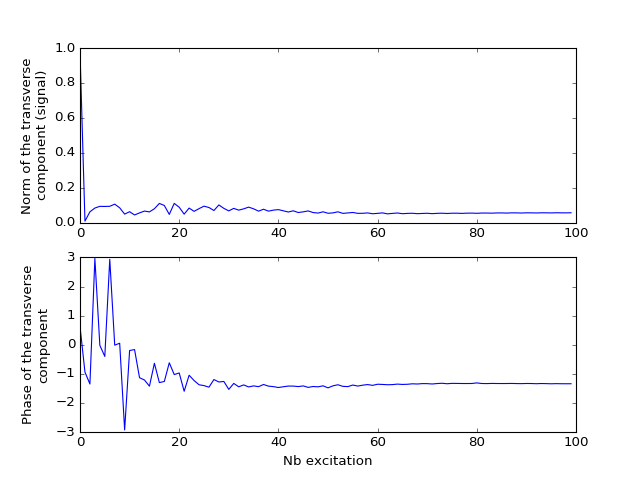

In [53]:
#B-5-a
df=50
T1=600 #ms
T2=100 #ms
TE=2 #ms
TR=10 #ms
flip=math.pi/6 #Standard flip angle

inc=117.0/180.0*math.pi
nb_excitations=100
nb_magnetisations=100
increment=inc
phi=0 #Angle of the axis for the excitation
spoil_angles=np.linspace((1/nb_magnetisations)*2*math.pi,2*math.pi,nb_magnetisations)
timer=0

M=np.zeros((nb_magnetisations,3))
M[:,0]=1

result=[]

[Ate,Bte]=matrix_generator.getFreePrecessMatrix(TE,T1,T2,df)
[Atr,Btr]=matrix_generator.getFreePrecessMatrix(TR-TE,T1,T2,df)

#We have a list of magnetisation vector. Each vector will be rotated by a certain angle spoil_angle after each cycle.

for i in range(nb_excitations):
        #RF excitation
        Rflip=MatrixGenerator().getThetaRotationMatrix(flip,phi)
        for j in range(nb_magnetisations):
            M[j]=Rflip.dot(M[j])
        
        #We wait until echo time
        for j in range(nb_magnetisations):
            M[j]=Ate.dot(M[j])+Bte
        
        Maverage=0
        for j in range(nb_magnetisations):
            Maverage=Maverage+(M[j][0]+1j*M[j][1])

        Maverage=Maverage/nb_magnetisations
        result.append(Maverage*cmath.exp(-(1j*phi)))

        #Relaxation until new excitation
        for j in range(nb_magnetisations):
            M[j]=Atr.dot(M[j])+Btr

        #Spoil effect
        for j in range(nb_magnetisations):
            M[j]=MatrixGenerator().getZRotationMatrix(spoil_angles[j]).dot(M[j])
                
        phi=phi+increment
        increment=increment+inc
        
result=np.asarray(result)
plt.figure()
plt.subplot(2,1,1)
plt.ylabel("Norm of the transverse\ncomponent (signal)")
plt.subplot(2,1,2)
plt.ylabel("Phase of the transverse\ncomponent")
plt.xlabel("Nb excitation")
plt.subplot(2,1,1)
plt.plot(np.abs(np.asarray(result)))
plt.subplot(2,1,2)
plt.plot(np.angle(np.asarray(result)))
plt.show()

In [54]:

print(spoil_angles)

[ 0.06283185  0.12566371  0.18849556  0.25132741  0.31415927  0.37699112
  0.43982297  0.50265482  0.56548668  0.62831853  0.69115038  0.75398224
  0.81681409  0.87964594  0.9424778   1.00530965  1.0681415   1.13097336
  1.19380521  1.25663706  1.31946891  1.38230077  1.44513262  1.50796447
  1.57079633  1.63362818  1.69646003  1.75929189  1.82212374  1.88495559
  1.94778745  2.0106193   2.07345115  2.136283    2.19911486  2.26194671
  2.32477856  2.38761042  2.45044227  2.51327412  2.57610598  2.63893783
  2.70176968  2.76460154  2.82743339  2.89026524  2.95309709  3.01592895
  3.0787608   3.14159265  3.20442451  3.26725636  3.33008821  3.39292007
  3.45575192  3.51858377  3.58141563  3.64424748  3.70707933  3.76991118
  3.83274304  3.89557489  3.95840674  4.0212386   4.08407045  4.1469023
  4.20973416  4.27256601  4.33539786  4.39822972  4.46106157  4.52389342
  4.58672527  4.64955713  4.71238898  4.77522083  4.83805269  4.90088454
  4.96371639  5.02654825  5.0893801   5.15221195  5.

In [55]:
def spgrsignal(flip,T1,T2,TE,TR,df=0,Nex=100,inc=117.0/180.0*math.pi):
    nb_magnetisations=100
    increment=inc

    phi=0 #Angle of the axis for the excitation
    spoil_angles=np.arange(1,nb_magnetisations+1,1)/nb_magnetisations*2*math.pi
    
    M=np.zeros((nb_magnetisations,3))
    M[:,0]=1
    
    [Ate,Bte]=matrix_generator.getFreePrecessMatrix(TE,T1,T2,df)
    [Atr,Btr]=matrix_generator.getFreePrecessMatrix(TR-TE,T1,T2,df)

    #We have a list of magnetisation vectors. Each vector will be rotated by a certain angle spoil_angle after each cycle.

    for i in range(nb_excitations):
        #RF excitation
        Rflip=MatrixGenerator().getThetaRotationMatrix(flip,phi)
        for j in range(nb_magnetisations):
            M[j]=Rflip.dot(M[j])

        #We wait until echo time
        for j in range(nb_magnetisations):
            M[j]=Ate.dot(M[j])+Bte

        Maverage=np.zeros(3)
        for j in range(nb_magnetisations):
            Maverage=Maverage+M[j]

        Maverage=Maverage/nb_magnetisations

        last_magnetisations=Maverage
        last_signal=(Maverage[0]+1j*Maverage[1])*cmath.exp(-(1j*phi))

        #Relaxation until new excitation
        for j in range(nb_magnetisations):
            M[j]=Atr.dot(M[j])+Btr

        #Spoil effect
        for j in range(nb_magnetisations):
            M[j]=MatrixGenerator().getZRotationMatrix(spoil_angles[j]).dot(M[j])

        phi=phi+increment
        increment=increment+inc

    return [last_magnetisations,last_signal]

<IPython.core.display.Javascript object>


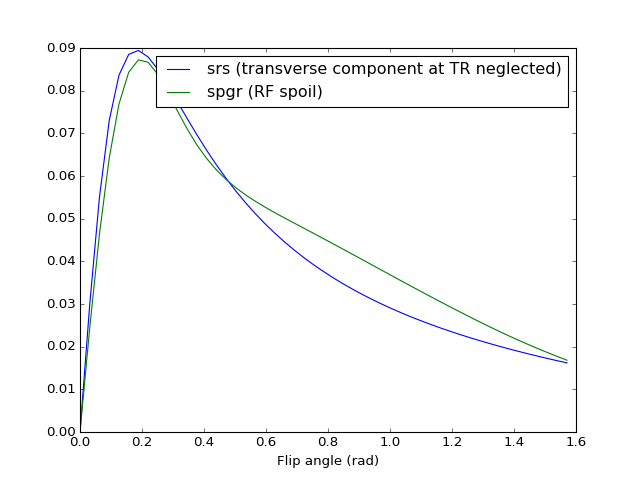

In [56]:
df=0
T1=600 #ms
T2=100 #ms
TE=2 #ms
TR=10 #ms
flip=np.linspace(0,0.5,51)*math.pi

srsignals=np.zeros(51,dtype=np.complex)
spgrsignals=np.zeros(51,dtype=np.complex)

for k in range(51):
    srsignals[k]=SteadyState().srsignal(flip[k],T1,T2,TE,TR,0)[1]
    spgrsignals[k]=SteadyState().spgrsignal(flip[k],T1,T2,TE,TR)[1]

plt.figure()
plt.xlabel("Flip angle (rad)")
plt.plot(flip,np.abs(srsignals),label="srs (transverse component at TR neglected)")
plt.plot(flip,np.abs(spgrsignals),label="spgr (RF spoil)")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


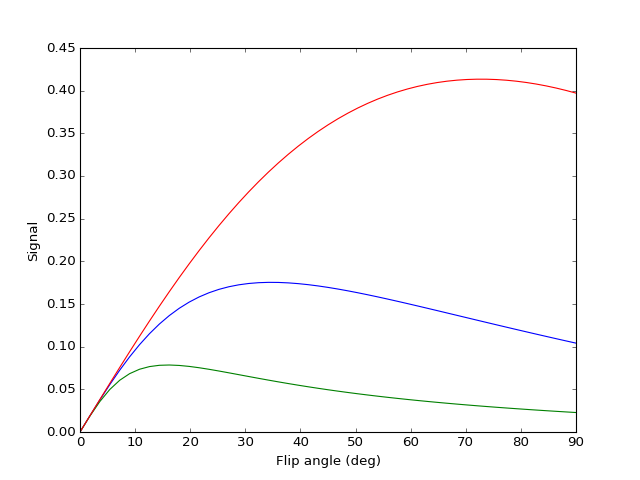

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [60]:
#Ernst angle for different tissues
df=0
TA1=600 #ms
TA2=100 #ms
TB1=3000 #ms
TB2=100 #ms
TC1=100 #ms
TC2=100 #ms

TE=50 #ms
TR=100 #ms
flip=np.linspace(0,0.5,51)*math.pi

Asignal=np.zeros(51,dtype=np.complex)
Bsignal=np.zeros(51,dtype=np.complex)
Csignal=np.zeros(51,dtype=np.complex)

for k in range(51):
    Asignal[k]=SteadyState().gresignal(flip[k],TA1,TA2,TE,TR,0)[1]
    Bsignal[k]=SteadyState().gresignal(flip[k],TB1,TB2,TE,TR,0)[1]
    Csignal[k]=SteadyState().gresignal(flip[k],TC1,TC2,TE,TR,0)[1]

plt.figure()
plt.xlabel("Flip angle (deg)")
plt.ylabel("Signal")
plt.plot(flip*180/math.pi,np.abs(Asignal))
plt.plot(flip*180/math.pi,np.abs(Bsignal))
plt.plot(flip*180/math.pi,np.abs(Csignal))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


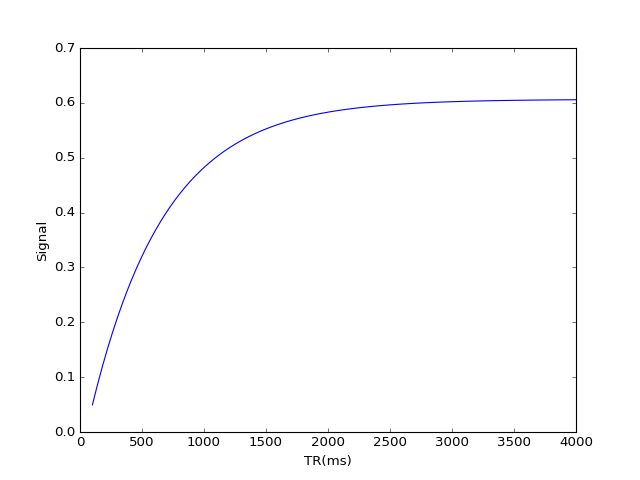

In [58]:
T1=600 #ms
T2=100 #ms
TE=50 #ms
df=0
TRs=np.linspace(100,4000,100)
result=np.zeros(len(TRs), dtype=np.complex)

for i in range(len(TRs)):
    [M,Msig]=SteadyState().sesignal(T1,T2,TE,TRs[i],0)
    result[i]=Msig

plt.figure()
plt.xlabel("TR(ms)")
plt.ylabel("Signal")
plt.plot(TRs,np.abs(result))
plt.show()


<IPython.core.display.Javascript object>


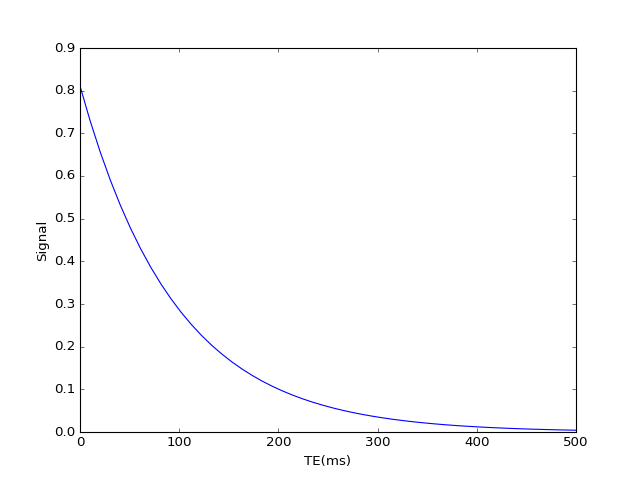

In [59]:
#C-1-b Spin echo. Influence of TE

T1=600 #ms
T2=100 #ms
TEs=np.linspace(0,500,50) #ms
df=0
TR=1000 #ms
result=np.zeros(len(TEs), dtype=np.complex)

for i in range(len(TEs)):
    [M,Msig]=SteadyState().sesignal(T1,T2,TEs[i],TR,0)
    result[i]=Msig

plt.figure()
plt.xlabel("TE(ms)")
plt.ylabel("Signal")
plt.plot(TEs,np.abs(result))
plt.show()

<IPython.core.display.Javascript object>


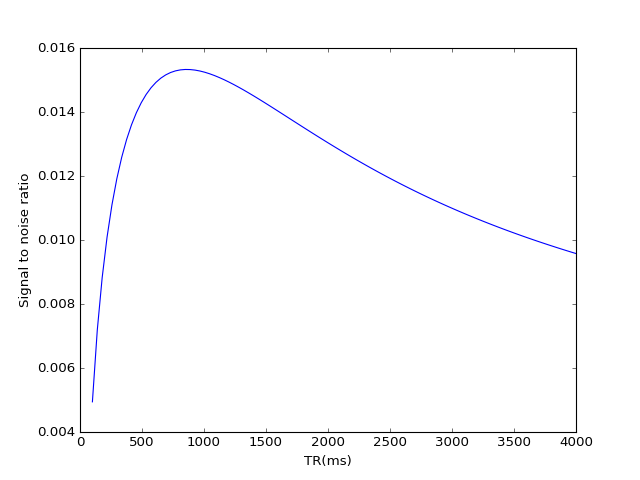

In [61]:
#C-1-c Spin echo. SNR~=Signal*sqrt(readout time)=Signal*sqrt(Total_time/TR*readout_per_TR). If the total time and  readout_per_TR are fixed parameters -> SNR ~ sqrt(1/TR)
T1=600 #ms
T2=100 #ms
TE=50 #ms
df=0
TRs=np.linspace(100,4000,100)
result=np.zeros(len(TRs), dtype=np.complex)

for i in range(len(TRs)):
    [M,Msig]=SteadyState().sesignal(T1,T2,TE,TRs[i],0)
    result[i]=Msig

plt.figure()
plt.xlabel("TR(ms)")
plt.ylabel("Signal to noise ratio")
plt.plot(TRs,np.abs(result)/np.sqrt(TRs))
plt.show()

<IPython.core.display.Javascript object>


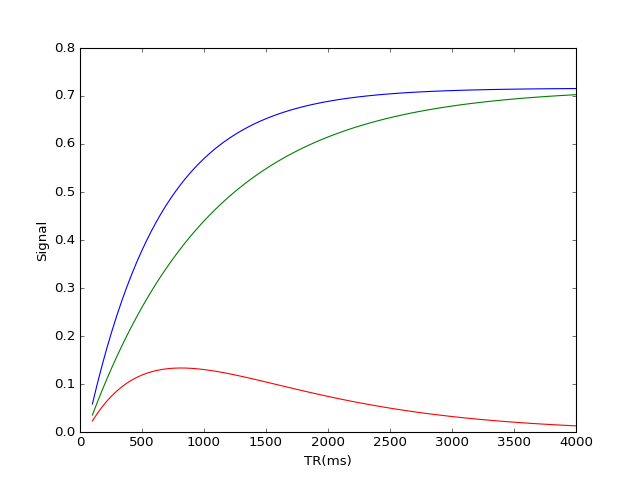

In [67]:
T1_a=600
T2_a=150
T1_b=1000
T2_b=150

TE=50 #ms
df=0
TRs=np.linspace(100,4000,100)
result_a=np.zeros(len(TRs), dtype=np.complex)
result_b=np.zeros(len(TRs), dtype=np.complex)

for i in range(len(TRs)):
    [M_a,Msig_a]=SteadyState().sesignal(T1_a,T2_a,TE,TRs[i],0)
    result_a[i]=Msig_a
    [M_b,Msig_b]=SteadyState().sesignal(T1_b,T2_b,TE,TRs[i],0)
    result_b[i]=Msig_b

plt.figure()
plt.xlabel("TR(ms)")
plt.ylabel("Signal")
plt.plot(TRs,np.abs(result_a), label="Tissue A")
plt.plot(TRs,np.abs(result_b), label="Tissue B")
plt.plot(TRs,np.abs(result_a)-np.abs(result_b), label="Tissue A-Tissue B")

#plt.legend()
plt.show()


<IPython.core.display.Javascript object>


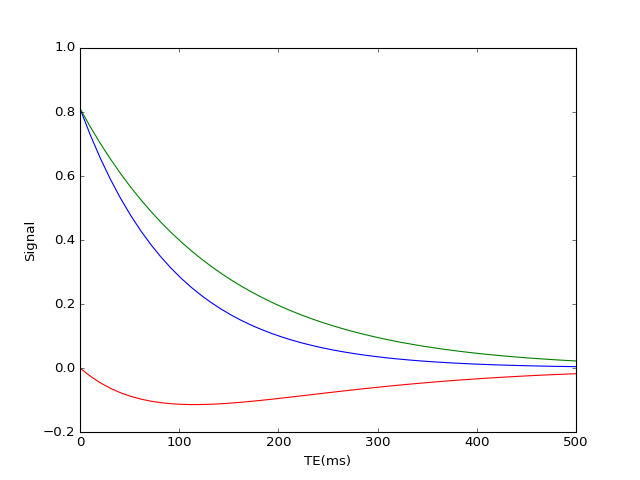

In [68]:
T1_a=600
T2_a=100
T1_b=600
T2_b=150

TE=50 #ms
df=0
TEs=np.linspace(0,500,50) #ms
TR=1000 #ms
result_a=np.zeros(len(TEs), dtype=np.complex)
result_b=np.zeros(len(TEs), dtype=np.complex)

for i in range(len(TEs)):
    [M_a,Msig_a]=SteadyState().sesignal(T1_a,T2_a,TEs[i],TR,0)
    result_a[i]=Msig_a
    [M_b,Msig_b]=SteadyState().sesignal(T1_b,T2_b,TEs[i],TR,0)
    result_b[i]=Msig_b

plt.figure()
plt.xlabel("TE(ms)")
plt.ylabel("Signal")
plt.plot(TEs,np.abs(result_a), label="Tissue A")
plt.plot(TEs,np.abs(result_b), label="Tissue B")
plt.plot(TEs,np.abs(result_a)-np.abs(result_b), label="Tissue A-Tissue B")

#plt.legend()
plt.show()

<IPython.core.display.Javascript object>


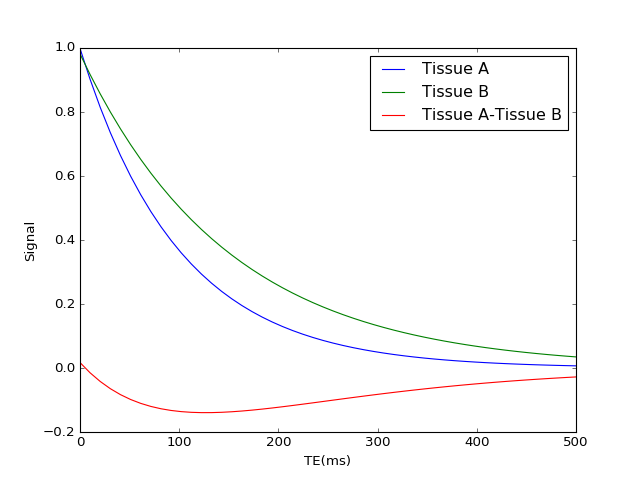

In [64]:
# C-2-c Two differents tissues. Influence of TE, but with a large TR to get a good T2-weighted image
T1_a=600
T2_a=100
T1_b=1000
T2_b=150

TE=50 #ms
df=0
TEs=np.linspace(0,500,50) #ms
TR=4000 #ms
result_a=np.zeros(len(TEs), dtype=np.complex)
result_b=np.zeros(len(TEs), dtype=np.complex)

for i in range(len(TEs)):
    [M_a,Msig_a]=SteadyState().sesignal(T1_a,T2_a,TEs[i],TR,0)
    result_a[i]=Msig_a
    [M_b,Msig_b]=SteadyState().sesignal(T1_b,T2_b,TEs[i],TR,0)
    result_b[i]=Msig_b

plt.figure()
plt.xlabel("TE(ms)")
plt.ylabel("Signal")
plt.plot(TEs,np.abs(result_a), label="Tissue A")
plt.plot(TEs,np.abs(result_b), label="Tissue B")
plt.plot(TEs,np.abs(result_a)-np.abs(result_b), label="Tissue A-Tissue B")

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


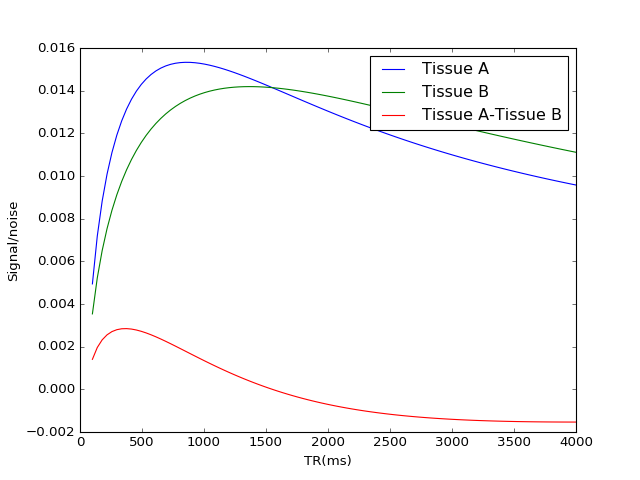

In [65]:
T1_a=600
T2_a=100
T1_b=1000
T2_b=150

TE=50 #ms
df=0
TRs=np.linspace(100,4000,100)
result_a=np.zeros(len(TRs), dtype=np.complex)
result_b=np.zeros(len(TRs), dtype=np.complex)

for i in range(len(TRs)):
    [M_a,Msig_a]=SteadyState().sesignal(T1_a,T2_a,TE,TRs[i],0)
    result_a[i]=Msig_a
    [M_b,Msig_b]=SteadyState().sesignal(T1_b,T2_b,TE,TRs[i],0)
    result_b[i]=Msig_b

plt.figure()
plt.xlabel("TR(ms)")
plt.ylabel("Signal/noise")
plt.plot(TRs,np.abs(result_a)/np.sqrt(TRs), label="Tissue A")
plt.plot(TRs,np.abs(result_b)/np.sqrt(TRs), label="Tissue B")
plt.plot(TRs,(np.abs(result_a)-np.abs(result_b))/np.sqrt(TRs), label="Tissue A-Tissue B")

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


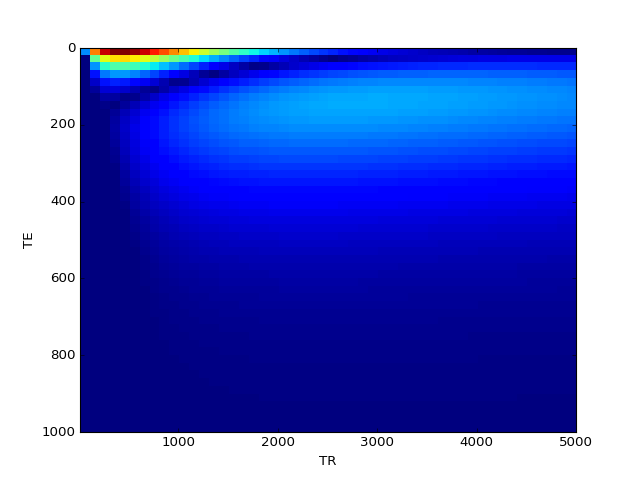

In [66]:
#C-3. Multiple Spin Echo Sequences
#C-3a For a simple spin-echo, what is the best TE and TR for a T1-weighted or T2-weighted image.
T1_a=600
T2_a=100
T1_b=1000
T2_b=150
df=0

TRs=np.linspace(10,5000,50)
TEs=np.linspace(0,1000,50) #ms


result=np.zeros((len(TRs), len(TEs)))

for i in range(len(TRs)):
    TR=TRs[i]
    for j in range(len(TEs)):
        TE=TEs[j]
        if (TE>TR):
            result[i][j]=0
        else:
            [M_a,Msig_a]=SteadyState().sesignal(T1_a,T2_a,TE,TR,0)
            [M_b,Msig_b]=SteadyState().sesignal(T1_b,T2_b,TE,TR,0)
            result[i][j]=np.abs(np.abs(Msig_a)-np.abs(Msig_b)) / math.sqrt(TR);
        
plt.figure()
plt.xlabel("TR")
plt.ylabel("TE")
plt.imshow(result.transpose(1,0), extent=[TRs.min(), TRs.max(), TEs.max(), TEs.min()], interpolation='nearest', aspect='auto')
plt.show()

In [67]:
max_index=np.unravel_index(result.argmax(), result.shape)
print("Optimal CNR. TR: {0}. TR: {1}".format(TRs[max_index[0]], TEs[max_index[1]]))
print("CNR value: {0}".format(result.max()))
best_cnr_for_echo_spin=result.max()

Optimal CNR. TR: 417.3469387755102. TR: 0.0
CNR value: 0.007832288083724418


<IPython.core.display.Javascript object>


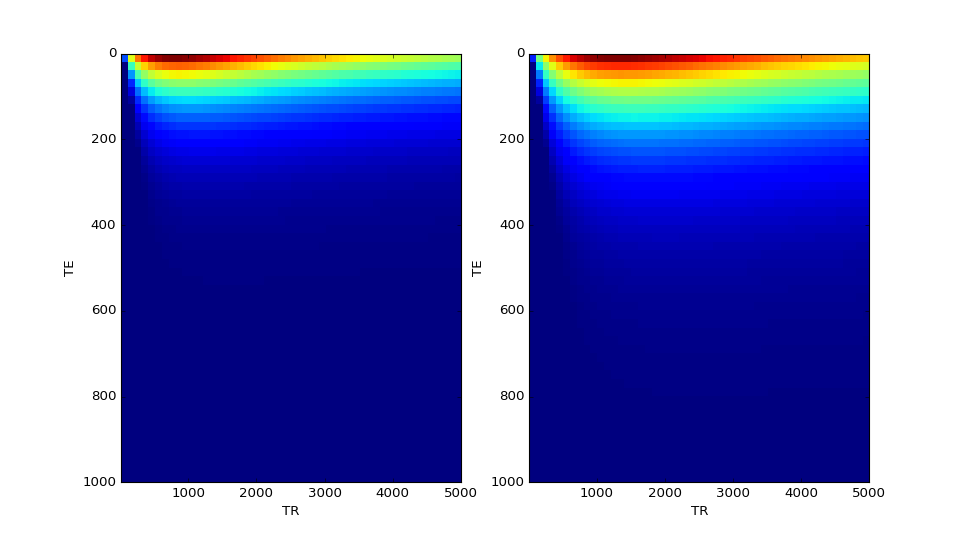

In [68]:
#C-3a SNR for the two optimal points (T1-weighted, T2-weighted), considering the CNR
T1_a=600
T2_a=100
T1_b=1000
T2_b=150
df=0

TRs=np.linspace(10,5000,50)
TEs=np.linspace(0,1000,50) #ms

result_a=np.zeros((len(TRs), len(TEs)))
result_b=np.zeros((len(TRs), len(TEs)))

for i in range(len(TRs)):
    TR=TRs[i]
    for j in range(len(TEs)):
        TE=TEs[j]
        if (TE>TR):
            result[i][j]=0
        else:
            [M_a,Msig_a]=SteadyState().sesignal(T1_a,T2_a,TE,TR,0)
            result_a[i][j]=np.abs(Msig_a)/math.sqrt(TR);
            [M_b,Msig_b]=SteadyState().sesignal(T1_b,T2_b,TE,TR,0)
            result_b[i][j]=np.abs(Msig_b)/math.sqrt(TR);        
        
plt.figure()
plt.subplot(1,2,1)
plt.xlabel("TR")
plt.ylabel("TE")
plt.imshow(result_a.transpose(1,0), extent=[TRs.min(), TRs.max(), TEs.max(), TEs.min()], interpolation='nearest', aspect='auto')
plt.subplot(1,2,2)
plt.xlabel("TR")
plt.ylabel("TE")
plt.imshow(result_b.transpose(1,0), extent=[TRs.min(), TRs.max(), TEs.max(), TEs.min()], interpolation='nearest', aspect='auto')
plt.show()

<IPython.core.display.Javascript object>


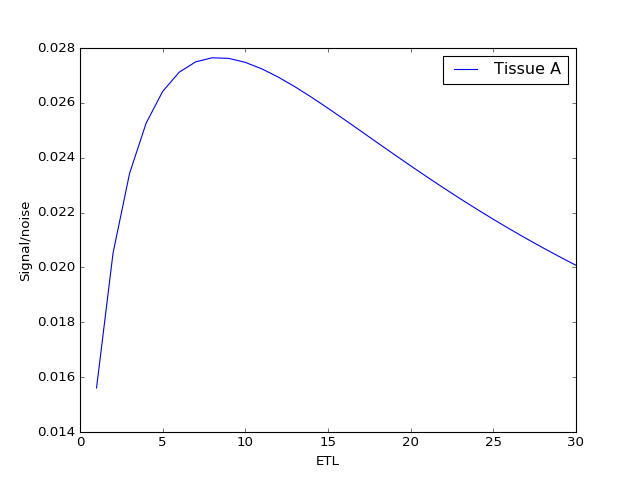

[ 0.01560576  0.02052916  0.02343136  0.02526101  0.02641728  0.02711752
  0.02749637  0.02764341  0.02762138  0.02747537  0.0272388   0.02693651
  0.02658749  0.02620603  0.02580325  0.02538751  0.02496539  0.02454173
  0.02412039  0.0237041   0.02329506  0.0228947   0.02250419  0.02212416
  0.02175516  0.02139733  0.02105082  0.02071549  0.02039128  0.02007786]


In [69]:
#C-3d multi-echo. Signal =sum of echos. SNR vs ETL for tissue A
T1_a=600
T2_a=100
df=0
TE=15
TR=3000
ETLs=np.arange(1,31)
result=np.zeros(len(ETLs))

for i in range(len(ETLs)):
    ETL=ETLs[i]
    echos=SteadyState().fsesignal(T1_a,T2_a,TE,TR,ETL,df)[1:,:]
    signals=echos[:,0]+1j*echos[:,1]
    sum=np.sum(np.abs(signals))
    result[i]=sum/math.sqrt(ETL*TR)
    
plt.figure()
plt.xlabel("ETL")
plt.ylabel("Signal/noise")
plt.plot(ETLs,result, label="Tissue A")

plt.legend()
plt.show()
print(result)

<IPython.core.display.Javascript object>


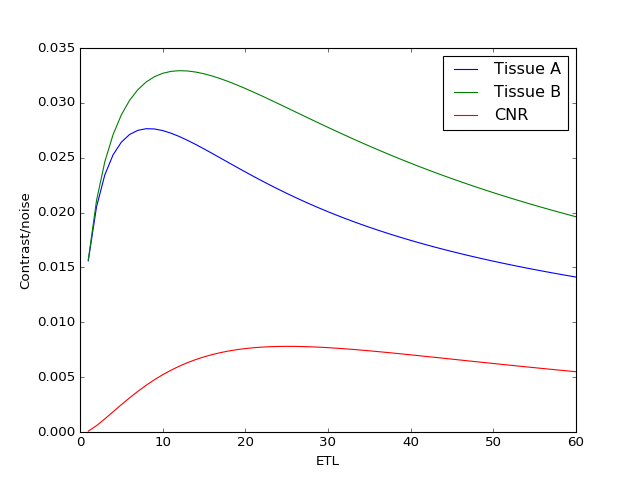

In [70]:
# C-3e multi-echo. Signal =sum of echos. CNR vs ETL for tissue A and tissue B
T1_a=600
T2_a=100
T1_b=1000
T2_b=150
df=0
TE=15
TR=3000
ETLs=np.arange(1,61)
result_a=np.zeros(len(ETLs))
result_b=np.zeros(len(ETLs))
result_cnr=np.zeros(len(ETLs))

for i in range(len(ETLs)):
    ETL=ETLs[i]
    echos_a=SteadyState().fsesignal(T1_a,T2_a,TE,TR,ETL,df)[1:,:]
    signals_a=echos_a[:,0]+1j*echos_a[:,1]
    sum_a=np.sum(np.abs(signals_a))
    result_a[i]=sum_a/math.sqrt(ETL*TR)

    echos_b=SteadyState().fsesignal(T1_b,T2_b,TE,TR,ETL,df)[1:,:]
    signals_b=echos_b[:,0]+1j*echos_b[:,1]
    sum_b=np.sum(np.abs(signals_b))
    result_b[i]=sum_b/math.sqrt(ETL*TR)

    result_cnr[i]=np.abs(sum_a-sum_b)/math.sqrt(ETL*TR)
    
plt.figure()
plt.xlabel("ETL")
plt.ylabel("Contrast/noise")
plt.plot(ETLs,result_a,label="Tissue A")
plt.plot(ETLs,result_b,label="Tissue B")
plt.plot(ETLs,result_cnr,label="CNR")

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


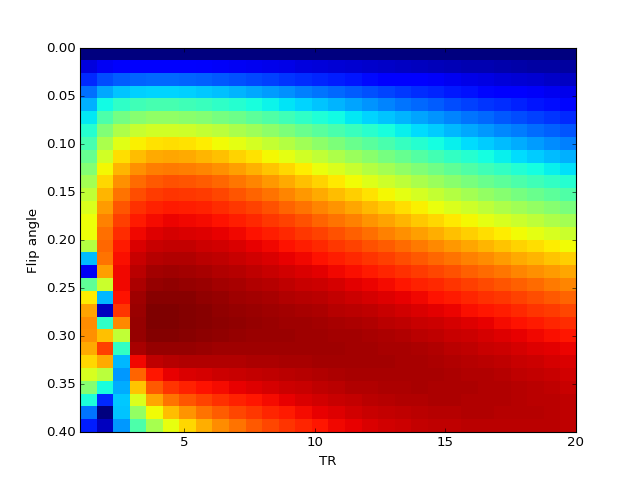

In [148]:
# C-4. RF-Spoiled Gradient Echo (SPGR)
# C-4a CNR efficiency of SPGR as a function of TR and flip angle

T1_a=600
T2_a=100
T1_b=1000
T2_b=150
TE=5
df=0

TRs=np.linspace(1,20,30)
flips=np.linspace(0.0,0.40,30) #rad

result=np.zeros((len(TRs), len(flips)))

for i in range(len(TRs)):
    TR=TRs[i]
    for j in range(len(flips)):
        flip=flips[j]
        [M_a,Msig_a]=SteadyState().spgrsignal(flip,T1_a,T2_a,TE,TR)
        [M_b,Msig_b]=SteadyState().spgrsignal(flip,T1_b,T2_b,TE,TR)
        result[i][j]=np.abs(np.abs(Msig_a)-np.abs(Msig_b)) / math.sqrt(TR);
        
plt.figure()
plt.xlabel("TR")
plt.ylabel("Flip angle")
plt.imshow(result.transpose(1,0), extent=[TRs.min(), TRs.max(), flips.max(), flips.min()], interpolation='nearest', aspect='auto')
plt.show()

In [80]:
max_index=np.unravel_index(result.argmax(), result.shape)
print(max_index)
print("Optimal CNR. TR: {0}. Flip angle: {1}".format(TRs[max_index[0]], flips[max_index[1]]))
print("CNR value: {0}".format(result.max()))
best_cnr_for_spgr=result.max()

(2, 6)
Optimal CNR. TR: 5.222222222222222. Flip angle: 0.26666666666666666
CNR value: 0.008391419917842055


<IPython.core.display.Javascript object>


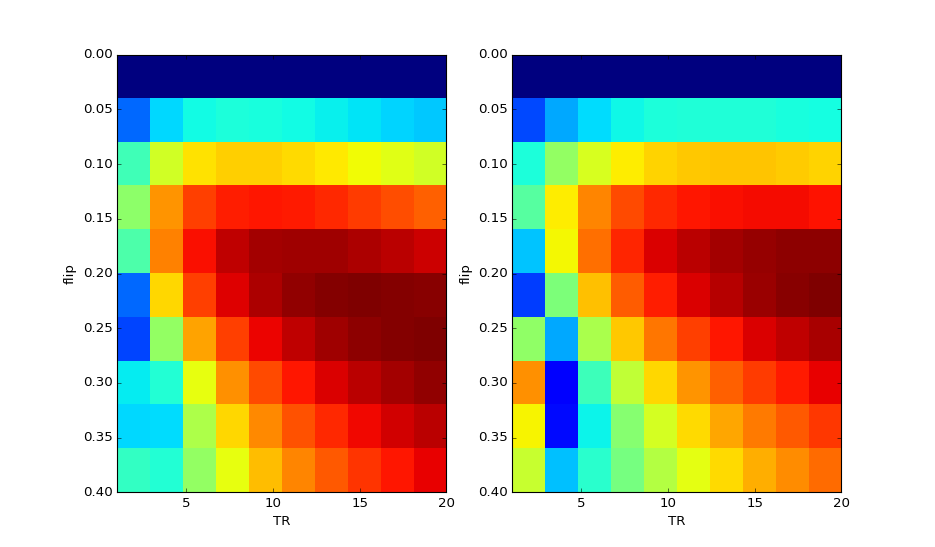

In [81]:
#C-4-b SNR for the two optimal points (T1-weighted, T2-weighted), considering the CNR
T1_a=600
T2_a=100
T1_b=1000
T2_b=150
TE=5
df=0

TRs=np.linspace(1,20,10)
flips=np.linspace(0.0,0.40,10) #rad

result_a=np.zeros((len(TRs), len(flips)))
result_b=np.zeros((len(TRs), len(flips)))

for i in range(len(TRs)):
    TR=TRs[i]
    for j in range(len(flips)):
        flip=flips[j]
        [M_a,Msig_a]=SteadyState().spgrsignal(flip,T1_a,T2_a,TE,TR)
        result_a[i][j]=np.abs(Msig_a)/math.sqrt(TR);
        [M_b,Msig_b]=SteadyState().spgrsignal(flip,T1_b,T2_b,TE,TR)
        result_b[i][j]=np.abs(Msig_b)/math.sqrt(TR);        
        
plt.figure()
plt.subplot(1,2,1)
plt.xlabel("TR")
plt.ylabel("flip")
plt.imshow(result_a.transpose(1,0), extent=[TRs.min(), TRs.max(), flips.max(), flips.min()], interpolation='nearest', aspect='auto')
plt.subplot(1,2,2)
plt.xlabel("TR")
plt.ylabel("flip")
plt.imshow(result_b.transpose(1,0), extent=[TRs.min(), TRs.max(), flips.max(), flips.min()], interpolation='nearest', aspect='auto')
plt.show()

In [82]:
#Comparison between SPIN ECHO and SPGRS
print ("Spin echo CNR: {0}, SPGR: {1}".format(best_cnr_for_echo_spin, best_cnr_for_spgr))

Spin echo CNR: 0.007832288083724418, SPGR: 0.008391419917842055


<IPython.core.display.Javascript object>


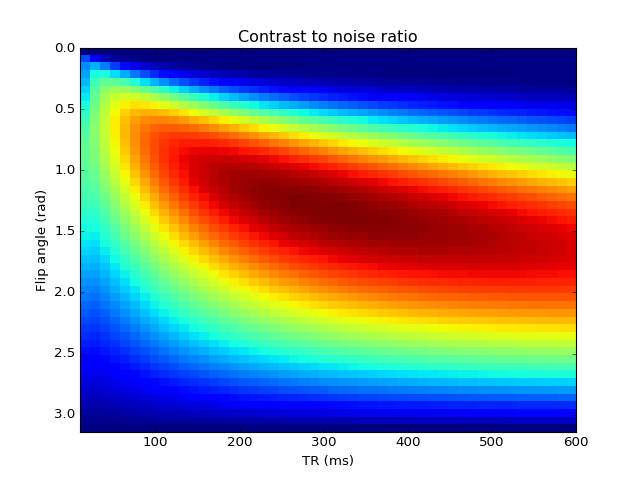

In [58]:
#C-5 Gradient Spoiled Gradient Echo
#C-5-a CNR efficiency of GRE as a function of TR and flip angle

T1_a=600
T2_a=100
T1_b=1000
T2_b=150
TE=5
df=0

TRs=np.linspace(10,600,50)
flips=np.linspace(0,math.pi,50) #rad

result=np.zeros((len(TRs), len(flips)))

for i in range(len(TRs)):
    TR=TRs[i]
    for j in range(len(flips)):
        flip=flips[j]
        [M_a,Msig_a]=SteadyState().gresignal(flip,T1_a,T2_a,TE,TR)
        [M_b,Msig_b]=SteadyState().gresignal(flip,T1_b,T2_b,TE,TR)
        result[i][j]=np.abs(np.abs(Msig_a)-np.abs(Msig_b)) / math.sqrt(TR);
        
plt.figure()
plt.xlabel("TR (ms)")
plt.ylabel("Flip angle (rad)")
plt.title("Contrast to noise ratio")
plt.imshow(result.transpose(1,0), extent=[TRs.min(), TRs.max(), flips.max(), flips.min()], interpolation='nearest', aspect='auto')
plt.show()

In [84]:
max_index=np.unravel_index(result.argmax(), result.shape)
print(max_index)
print("Optimal CNR. TR: {0}. Flip angle: {1}".format(TRs[max_index[0]], flips[max_index[1]]))
print("CNR value: {0}".format(result.max()))
best_cnr_for_gre=result.max()

(23, 20)
Optimal CNR. TR: 286.9387755102041. Flip angle: 1.2822827157509358
CNR value: 0.007326005691380534


In [85]:
#Comparison between SPIN ECHO and SPGRS
print ("Spin echo CNR: {0}, SPGR: {1}, GRE: {2}".format(best_cnr_for_echo_spin, best_cnr_for_spgr, best_cnr_for_gre))

Spin echo CNR: 0.007832288083724418, SPGR: 0.008391419917842055, GRE: 0.007326005691380534


In [86]:
#C-6-a
def ssfpavsignal(flip,T1,T2,TE,TR,frequency,deltaf):
    dfs=np.random.uniform(frequency-deltaf,frequency+deltaf, size=500)
    sum=0
    
    for i in range(len(dfs)):
        [M,M_sig]=SteadyState().sssignal(flip,T1,T2,TE,TR,dfs[i])
        sum=sum+M_sig
    
    sum=sum/100.0
    return np.abs(sum)

<IPython.core.display.Javascript object>


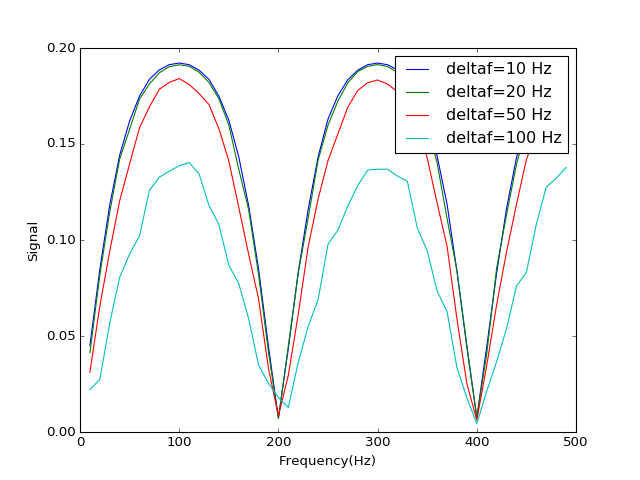

In [87]:
TR=5
TE=2.5
T1=600
T2=100

flip=math.pi/3
freqs=np.arange(10,500,10)
deltafs=np.asarray([10,20,50,100])

result=np.zeros((len(deltafs),len(freqs)), dtype=np.complex)

for i in range(len(deltafs)):
    deltaf=deltafs[i]
    for j in range(len(freqs)):
        freq=freqs[j]
        result[i][j]=SteadyState().ssfpavsignal(flip,T1, T2, TE, TR, freq, deltaf)[1]
    
plt.figure()
plt.xlabel("Frequency(Hz)")
plt.ylabel("Signal")
for signal, label in zip(result[:], deltafs):
    plt.plot(freqs,np.abs(signal),label="deltaf={0} Hz".format(label))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


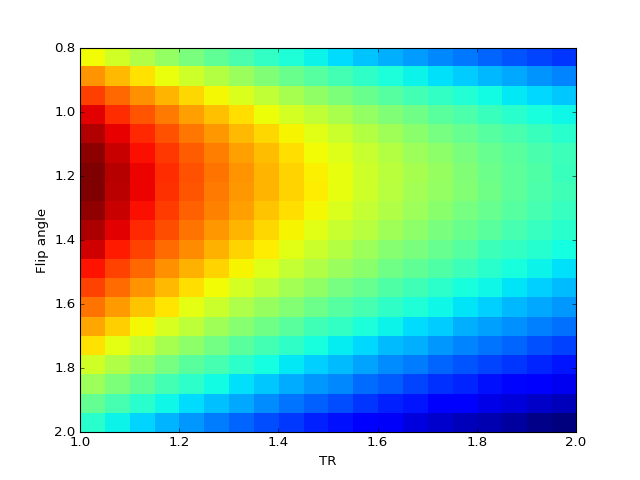

In [88]:
#C-6-b
deltaf=30
T1_a=600
T2_a=100
T1_b=1000
T2_b=150

TRs=np.linspace(1,2,20)
flips=np.linspace(0.8,2.0,20) #rad

result=np.zeros((len(TRs), len(flips)))

for i in range(len(TRs)):
    TR=TRs[i]
    TE=TR/2
    frequency=1/TR*1000/2
    for j in range(len(flips)):
        flip=flips[j]
        [M_a,Msig_a]=SteadyState().ssfpavsignal(flip,T1_a,T2_a,TE,TR,frequency,deltaf)
        [M_b,Msig_b]=SteadyState().ssfpavsignal(flip,T1_b,T2_b,TE,TR,frequency,deltaf)
        result[i][j]=np.abs(np.abs(Msig_a)-np.abs(Msig_b)) / math.sqrt(TR);
        
plt.figure()
plt.xlabel("TR")
plt.ylabel("Flip angle")
plt.imshow(result.transpose(1,0), extent=[TRs.min(), TRs.max(), flips.max(), flips.min()], interpolation='nearest', aspect='auto')
plt.show()

In [89]:
max_index=np.unravel_index(result.argmax(), result.shape)
print(max_index)
print("Optimal CNR. TR: {0}. Flip angle: {1}".format(TRs[max_index[0]], flips[max_index[1]]))
print("CNR value: {0}".format(result.max()))
best_cnr_for_ssfp=result.max()

(0, 7)
Optimal CNR. TR: 1.0. Flip angle: 1.2421052631578948
CNR value: 0.013597596186363137


In [90]:
print ("Spin echo CNR: {0}, SPGR: {1}, GRE: {2} SSFP: {3}".format(best_cnr_for_echo_spin, best_cnr_for_spgr, best_cnr_for_gre, best_cnr_for_ssfp))

Spin echo CNR: 0.007832288083724418, SPGR: 0.008391419917842055, GRE: 0.007326005691380534 SSFP: 0.013597596186363137


# Selective Excitation Simulations

<IPython.core.display.Javascript object>


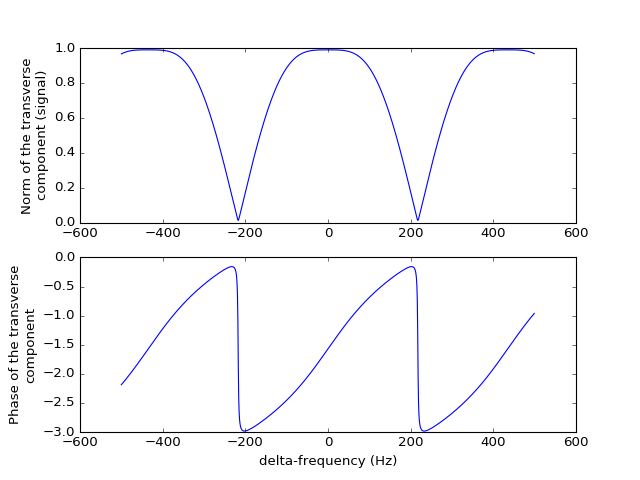

In [3]:
flip=math.pi/4
Ti=2.3 #ms
dfs=np.arange(-500,500)
T1=600
T2=100

result=np.zeros(len(dfs), dtype=np.complex)
flip_matrix=MatrixGenerator().getThetaRotationMatrix(flip,0)

for i in range(len(dfs)):
    df=dfs[i]
    [A,B]=MatrixGenerator().getFreePrecessMatrix(Ti,T1,T2,df)
    M=flip_matrix.dot(A.dot(flip_matrix.dot(np.asarray([0,0,1]))+B))
    result[i]=M[0]+1j*M[1]

plt.figure()
plt.subplot(2,1,1)
plt.ylabel("Norm of the transverse\ncomponent (signal)")
plt.plot(dfs,np.abs(result))
plt.subplot(2,1,2)
plt.ylabel("Phase of the transverse\ncomponent")
plt.plot(dfs,np.angle(result))
plt.xlabel("delta-frequency (Hz)")
plt.show()

<IPython.core.display.Javascript object>


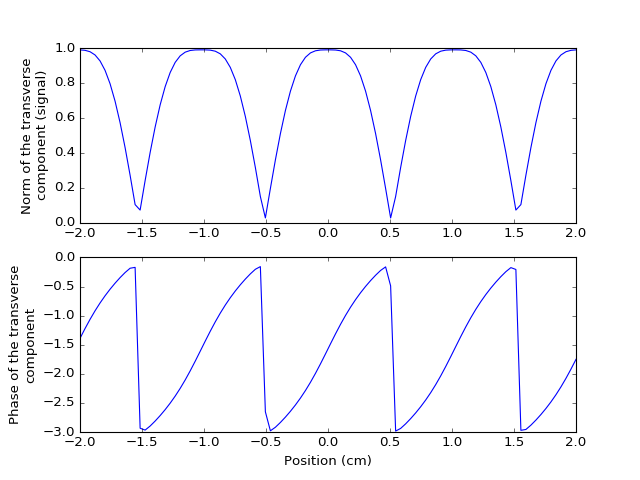

In [4]:
#F-1-b
gradient_x=0.1 #G/cm
larmor_ratio=4258 #Hz/G
positions=np.linspace(-2,2,100)

flip=math.pi/4
Ti=2.3 #ms
T1=600
T2=100

result=np.zeros(len(positions), dtype=np.complex)
flip_matrix=MatrixGenerator().getThetaRotationMatrix(flip,0)

for i in range(len(positions)):
    position=positions[i]
    [A,B]=MatrixGenerator().getFreePrecessMatrix(Ti,T1,T2,0)
    rotation_from_gradient_angle=larmor_ratio*2*math.pi*gradient_x*position*Ti/1000
    rotation_from_gradient_matrix=MatrixGenerator().getZRotationMatrix(rotation_from_gradient_angle)
    M=flip_matrix.dot(rotation_from_gradient_matrix.dot(A.dot(flip_matrix.dot(np.asarray([0,0,1]))+B)))
    result[i]=M[0]+1j*M[1]

plt.figure()
plt.subplot(2,1,1)
plt.ylabel("Norm of the transverse\ncomponent (signal)")
plt.plot(positions,np.abs(result))
plt.subplot(2,1,2)
plt.ylabel("Phase of the transverse\ncomponent")
plt.plot(positions,np.angle(result))
plt.xlabel("Position (cm)")
plt.show()

<IPython.core.display.Javascript object>


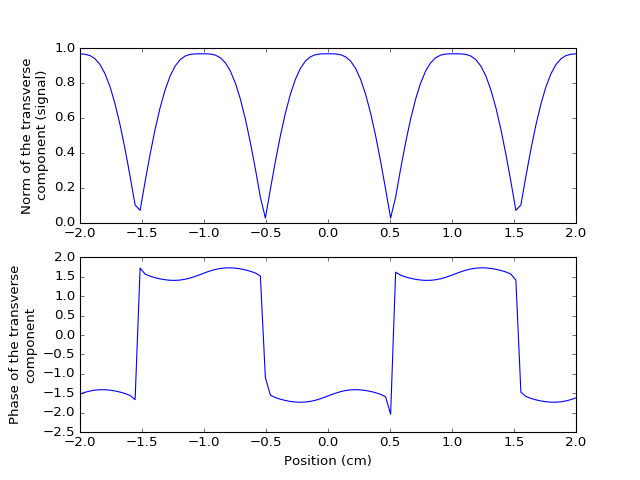

In [8]:
gradient_x=0.1 #G/cm
larmor_ratio=4258 #Hz/G
positions=np.linspace(-2,2,100)

flip=math.pi/4
Ti=2.3 #ms
T1=600
T2=100

result=np.zeros(len(positions), dtype=np.complex)
flip_matrix=MatrixGenerator().getThetaRotationMatrix(flip,0)
for i in range(len(positions)):
    M=np.asarray([0,0,1])
    position=positions[i] 
    [A,B]=MatrixGenerator().getFreePrecessMatrix(Ti,T1,T2,0)
    rotation_from_gradient_angle=larmor_ratio*2*math.pi*gradient_x*position*Ti/1000

    #First Excitation
    M=flip_matrix.dot(M)

    #Free precession
    M=A.dot(M)+B
    
    #Gradient
    rotation_from_gradient_matrix=MatrixGenerator().getZRotationMatrix(rotation_from_gradient_angle)
    M=rotation_from_gradient_matrix.dot(M)
    
    #Second excitation
    M=flip_matrix.dot(M)

    #Free precession
    M=A.dot(M)+B

    #Inverted gradient    
    rotation_from_gradient_matrix=MatrixGenerator().getZRotationMatrix(-0.5*rotation_from_gradient_angle)
    M=rotation_from_gradient_matrix.dot(M)    
    result[i]=M[0]+1j*M[1]

plt.figure()
plt.subplot(2,1,1)
plt.ylabel("Norm of the transverse\ncomponent (signal)")
plt.plot(positions,np.abs(result))
plt.subplot(2,1,2)
plt.ylabel("Phase of the transverse\ncomponent")
plt.plot(positions,np.angle(result))
plt.xlabel("Position (cm)")
plt.show() 

<IPython.core.display.Javascript object>


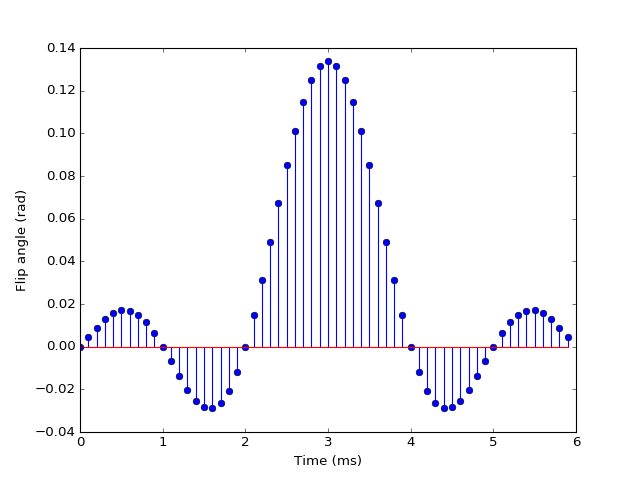

81.6741507676


In [44]:
time=np.arange(0,6,0.1)
B1=0.05*np.sinc(time-3)/1
plt.figure()
flip=2*math.pi*4258*B1*0.1/1000
plt.stem(time,flip)
plt.xlabel("Time (ms)")
plt.ylabel("Flip angle (rad)")
print(np.sum(flip)*180.0/math.pi)

<IPython.core.display.Javascript object>


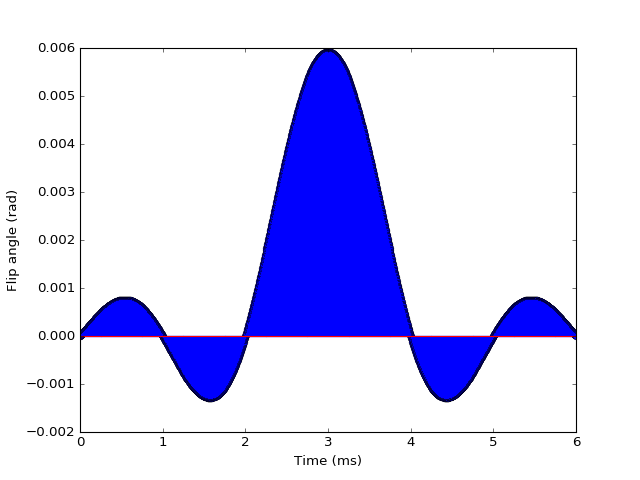

90.3787012563


In [30]:
time=np.arange(0,6,0.004)
B1=0.05*np.sinc(times-3)/1
plt.figure()
flip=2*math.pi*4258*B1*0.004/1000
plt.stem(time,flip)
plt.xlabel("Time (ms)")
plt.ylabel("Flip angle (rad)")
print(np.sum(flip)*180/math.pi)

<IPython.core.display.Javascript object>


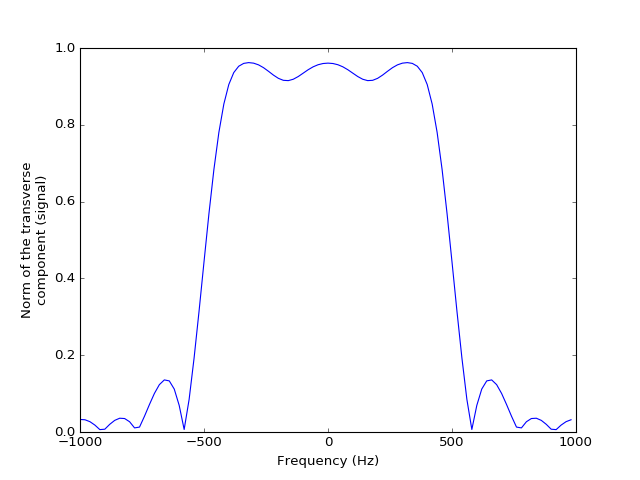

In [66]:
#F-2-c
dt=0.04
T1 = 600;       # ms.
T2 = 100;       # ms.
times=np.arange(0,6,dt)
B1=0.05*np.sinc(times-3)/1
flips=2*math.pi*4258*B1*dt/1000
freqs=np.arange(-1000,1000,20)
result=[]

for freq in freqs:   
    M=np.asarray([0,0,1])
    for flip in flips:
        Rflip=MatrixGenerator().getYRotationMatrix(flip)
        M=Rflip.dot(M)
        [A,B]=MatrixGenerator().getFreePrecessMatrix(dt,T1,T2,freq)
        M=A.dot(M)+B

    result.append(M[0]+1j*M[1])

result=np.asarray(result)

plt.figure()
plt.subplot(1,1,1)
plt.ylabel("Norm of the transverse\ncomponent (signal)")
plt.plot(freqs,np.abs(result))
plt.subplot(2,1,2)
plt.ylabel("Phase of the transverse\ncomponent")
plt.plot(freqs,np.angle(result))
plt.xlabel("Frequency (Hz)")
plt.show()

<IPython.core.display.Javascript object>


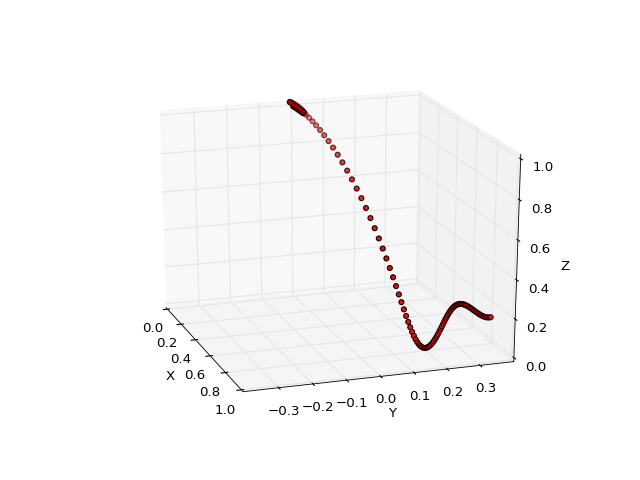

(0, 1)

In [50]:
#Let's try to see what happens in 3D for two different cases.
#F-2-c
dt=0.04
T1 = 600;       # ms.
T2 = 100;       # ms.
times=np.arange(0,6,dt)
B1=0.05*np.sinc(times-3)/1
flips=2*math.pi*4258*B1*dt/1000
result=[]

M=np.asarray([0,0,1])
for flip in flips:
    Rflip=MatrixGenerator().getYRotationMatrix(flip)
    M=Rflip.dot(M)
    [A,B]=MatrixGenerator().getFreePrecessMatrix(dt,T1,T2,20)
    M=A.dot(M)+B
    result.append(M)

result=np.asarray(result)
Mx=result[:,0]
My=result[:,1]
Mz=result[:,2]



fig=plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(Mx,My,Mz,c=(1,0,0))
ax.axis('equal')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 1])


In [217]:
def sliceprofile(B1s,gradients,times,T1,T2,positions,df):
    result_m=np.zeros((len(positions),3))
    result_m_sig=np.zeros(len(positions), dtype=np.complex)
    larmor_ratio=4258 #Hz/G
    dt=times[1]-times[0]
    flips=B1s*2*math.pi*dt*larmor_ratio
    
    [A,B]=MatrixGenerator().getFreePrecessMatrix(1000*dt/2,T1,T2,df)            

    for i, position in enumerate(positions):
        M=np.asarray([0,0,1])
        for j, time in enumerate(times):
            #Free precession
            M=A.dot(M)+B
            
            #Half gradient
            rotation_from_gradient_angle=2*math.pi*larmor_ratio*position/10*gradients[j]*dt/2            
            Rgradient=MatrixGenerator().getZRotationMatrix(rotation_from_gradient_angle)
            M=Rgradient.dot(M)
                
            #RF excitation
            Rflip=MatrixGenerator().getThetaRotationMatrix(np.abs(flips[j]),np.angle(flips[j]))
            M=Rflip.dot(M)
            #Half-Gradient 
            M=Rgradient.dot(M)
            
            #Free precession
            M=A.dot(M)+B
            

        
        result_m[i]=M
        result_m_sig[i]=M[0]+1j*M[1]
    
    return [result_m,result_m_sig]

<IPython.core.display.Javascript object>


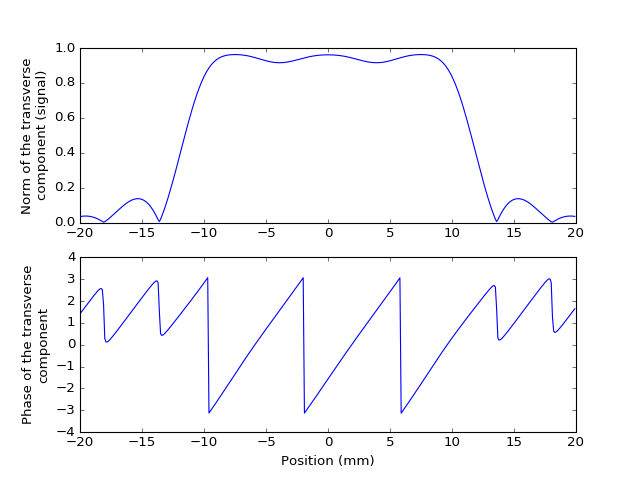

In [218]:
t = np.arange(0,6E-3,1E-4);
x= np.arange(-20,20,0.1);
[m,m_sig]=sliceprofile(.05*np.sinc(1000*t-3),0.1*np.ones(len(t)),t,600,100,x,0)

plt.figure()
plt.subplot(2,1,1)
plt.ylabel("Norm of the transverse\ncomponent (signal)")
plt.plot(x,np.abs(m_sig))
plt.subplot(2,1,2)
plt.ylabel("Phase of the transverse\ncomponent")
plt.plot(x,np.angle(m_sig))
plt.xlabel("Position (mm)")
plt.show()

<IPython.core.display.Javascript object>


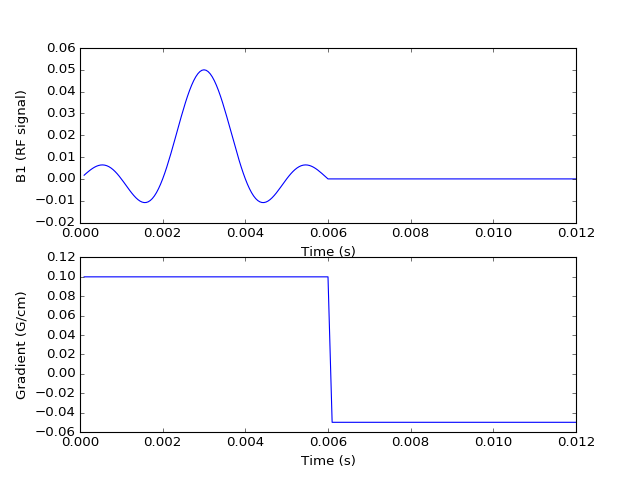

In [225]:
t = np.arange(0.0001,.006+.00005,.00005)
rf=.05*np.sinc(1000*t-3)
grad=0.1*np.ones(len(t))

#We add the refocusing gradient
grad=np.append(grad,-grad/2)

#We increase the timing
t=np.append(t,t+0.006)

#We add some 0 for the RF signal
rf=np.append(rf,rf*0)

x= np.arange(-20,20+0.2,0.2);
[m,m_sig]=sliceprofile(rf,grad,t,600,100,x,0)

plt.figure()
#plt.subplot(3,2,1)
#plt.plot(x,np.abs(m_sig))
#plt.xlabel("Position (mm)")
#plt.ylabel("Signal mag")

#plt.subplot(3,2,3)
#plt.plot(x,np.angle(m_sig))
#plt.xlabel("Position (mm)")
#plt.ylabel("Signal phase (rad)")

#plt.subplot(3,2,5)
#plt.plot(x,m[:,2])
#plt.xlabel("Position (mm)")
#plt.ylabel("Residual M_z")

plt.subplot(2,1,1)
plt.plot(t,rf)
plt.xlabel("Time (s)")
plt.ylabel("B1 (RF signal)")

plt.subplot(2,1,2)
plt.plot(t,grad)
plt.xlabel("Time (s)")
plt.ylabel("Gradient (G/cm)")


plt.show()

<IPython.core.display.Javascript object>


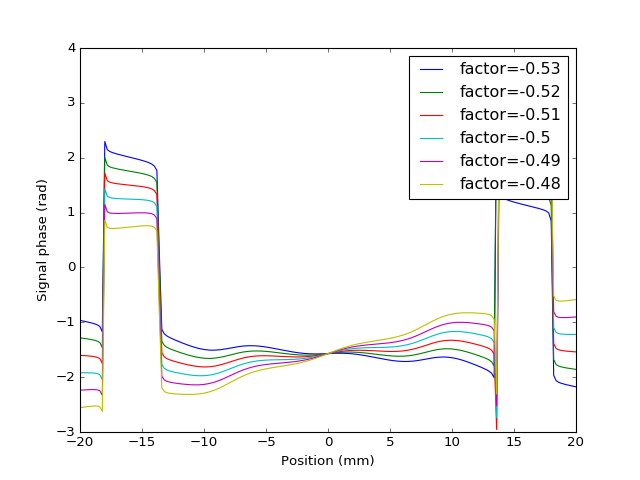

In [227]:
plt.figure()

for factor in np.arange(-0.53,-0.48,0.01):
    t = np.arange(0.0001,.006+.00005,.00005)
    rf=.05*np.sinc(1000*t-3)
    grad=0.1*np.ones(len(t))

    #We add the refocusing gradient
    grad=np.append(grad,grad*factor)
    
    #We increase the timing
    t=np.append(t,t+0.006)

    #We add some 0 for the RF signal
    rf=np.append(rf,rf*0)

    x= np.arange(-20,20+0.2,0.2);
    [m,m_sig]=sliceprofile(rf,grad,t,600,100,x,0)

    plt.plot(x,np.angle(m_sig), label="factor={0}".format(factor))
    plt.xlabel("Position (mm)")
    plt.ylabel("Signal phase (rad)")

plt.show()
plt.legend()